# Entrega laboratorio 3

## Integrantes 

- Javier Steven Barrera Toro - 202214779
- Julian Santiago Rolon Toloza - 202215839

In [169]:
from matplotlib import pyplot as plt
from typing import List, Tuple, NewType
import numpy as np
import pandas as pd
import sympy as sp

# imports to neural networks section
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec
import time
import warnings

# Problema 1

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = 3x^3 - 10x^2 - 56 x + 50$ dentro del intervalo $[-6, 6]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales. 

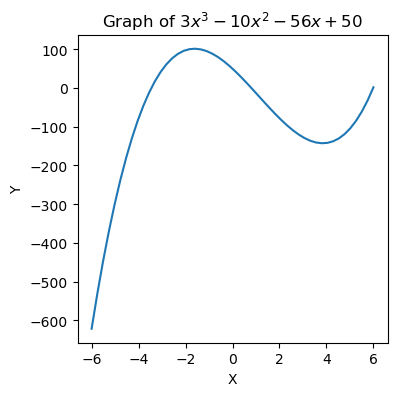

In [283]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(4, 4))
plt.plot(X, Y)
plt.title('Graph of $3x^3 - 10x^2 - 56x + 50$')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Implementación del algoritmo de Newton-Raphson

La siguiente implementación calcula las derivadas y las segundas derivadas utilizando Sympy, lo cual facilita la definición de la misma función. 

In [284]:
def newton_raphson(initial_guess: int, tolerance: float, N_max: int, alpha: float, function) -> Tuple[float, int]:
    """Function to execute the 1D Newton-Raphson method given a function in Sympy format.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.

    Returns:
        Tuple[float, int]: The minimum value of the function.
    """
    k = 0
    x = [initial_guess]

    derivative = sp.lambdify('x', sp.diff(function, 'x'), 'numpy')
    double_derivative = sp.lambdify('x', sp.diff(sp.diff(function), 'x'), 'numpy')

    while k < N_max:
        f_prime_val = derivative(x[k])
        if abs(f_prime_val) < tolerance:
            break
        
        f_double_prime_val = double_derivative(x[k])
        if f_double_prime_val == 0:
            raise ValueError("The second derivative is zero.")

        d_k = - alpha * f_prime_val / f_double_prime_val
        
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1], k, x

In [285]:
function = sp.simplify('3*x**3 - 10*x**2 - 56*x + 50')
function

3*x**3 - 10*x**2 - 56*x + 50

## Calculo análitico de las derivadas de $f(x)$

Calculemos las derivadas de manera análitica para el método de 1 dimensión. Dada $f(x) = 3x^3 - 10x^2 - 56 x + 50$, la derivada $f'(x)$ es:
$$
9x^2 - 20x - 56
$$

Asimismo, la segunda derivada $f^{(2)}(x)$ de la función corresponde a:
$$
18x - 20
$$

## Diferentes valores iniciales $x_0$

En el siguiente código se puede observar que para distintos valores iniciales se llegan a dos puntos extremos, aproximadamente $1.61$ y $3.84$. 

In [286]:
x_0 = np.arange(-6, 7, 1)
mins = [newton_raphson(x, 1e-8, 100, 0.05, function)[0] for x in x_0]
mins = list(map(lambda x: round(x, 2), mins))
mins

[np.float64(-1.67),
 np.float64(-1.65),
 np.float64(-1.64),
 np.float64(-1.63),
 np.float64(-1.62),
 np.float64(-1.62),
 np.float64(-1.61),
 np.float64(-1.61),
 np.float64(3.83),
 np.float64(3.84),
 np.float64(3.84),
 np.float64(3.85),
 np.float64(3.86)]

Esto se verifica en la siguiente gráfica, en el cual para valores enteros de -6 a 6 obtenemos que se llegan a estos puntos extremos. 

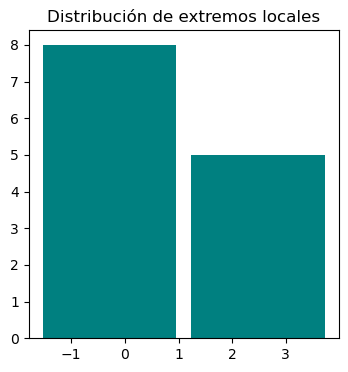

In [287]:
plt.figure(figsize=(4,4))
plt.title('Distribución de extremos locales')
plt.hist(mins, bins=2, rwidth=0.9, color='teal')
plt.show()

## Diferentes valores iniciales de $\alpha$

Para probar como varia el proceso de optimización en base al factor de paso $\alpha$ se van a utilizar diferentes valores del mismo y luego se revisará cuantos pasos y si se converge a un mismo valor. Como se puede ver en la siguiente celda de código se coverge al mismo valor $-1.6$. Además se puede observar que para distintos factores de paso se llega al mismo punto, la diferencia significativa esta en la cantidad de pasos necesarios para llegar a la solución. Para un factor de paso de 0.01 se utilizan 1969 pasos y para un factor de 1.02 se utilizan unicamente 6 pasos, ambos llegando a la misma solución.

In [288]:
alphas = np.linspace(0.01, 1.3, 15)

mins = [newton_raphson(-6, 1e-6, 2000, alpha, function)[0] for alpha in alphas]
steps = [newton_raphson(-6, 1e-6, 2000, alpha, function)[1] for alpha in alphas]

pd.DataFrame({
    'Alfa': list(map(lambda x: round(float(x), 2), alphas)),
    'Min. val': list(map(lambda x: round(float(x), 1), mins)),
    'Pasos': steps
})

,Alfa,Min. val,Pasos
0,0.01,-1.6,1969
1,0.10,-1.6,185
2,0.19,-1.6,93
3,0.29,-1.6,60
4,0.38,-1.6,43
5,0.47,-1.6,32
6,0.56,-1.6,25
7,0.66,-1.6,20
8,0.75,-1.6,16
9,0.84,-1.6,12


## Gráfica con los puntos encontrados

En la siguiente gráfica se pueden observar los extremos locales hallados para diferentes puntos iniciales. En esta gráfica se puede observar que se convergen a los dos puntos antes mencionados. 

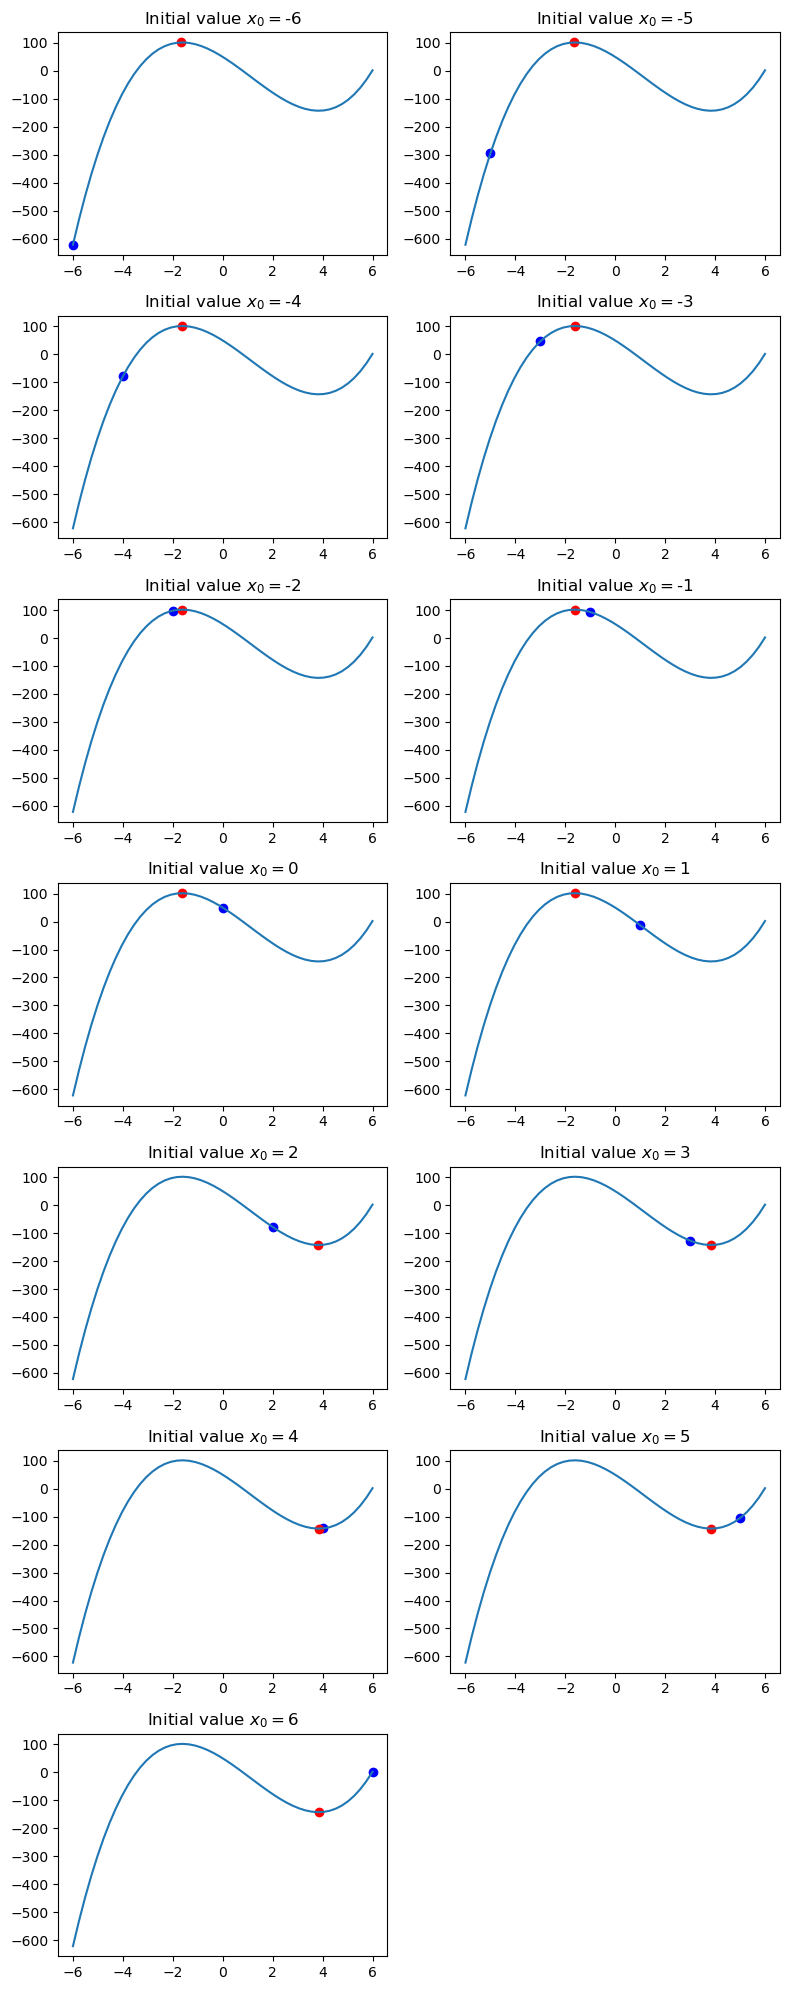

In [289]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(8,20), tight_layout=True)

for i, x in enumerate(x_0):
    x_min = newton_raphson(x, 1e-6, 100, 0.05, function)[0]

    plt.subplot(7, 2, i + 1)
    plt.plot(X, Y)
    plt.scatter(x, 3 * x ** 3 - 10 * x ** 2 - 56 * x + 50, color='blue')
    plt.scatter(x_min, 3 * x_min ** 3 - 10 * x_min ** 2 - 56 * x_min + 50, color='red')
    plt.title(f'Initial value $x_0 = ${x}')

## Análisis del comportamiento de convergencia

El algoritmo de Newton-Raphson muestra una convergencia efectiva hacia un máximo local de la función en todos los casos, independientemente del valor inicial $x_0$. Los puntos azules representan los valores iniciales, mientras que los puntos rojos indican la convergencia final del algoritmo. Se observa que, incluso con valores iniciales alejados del máximo, el método logra alcanzar de manera rápida y consistente la misma solución en todos los casos, lo que indica una buena estabilidad y eficiencia en la optimización. Sin embargo, es importante notar que este comportamiento depende de la elección adecuada del punto de inicio y de la forma de la función, ya que Newton-Raphson puede fallar o converger a otros puntos en escenarios más complejos.

# Problema 2

In [128]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, lambdify

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = x^5 - 8x^3 + 10x +6$ dentro del intervalo $[-3, 3]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales.

In [129]:
function = sp.simplify('x**5 - 8*x**3 + 10 * x + 6')
function

x**5 - 8*x**3 + 10*x + 6

La gráfica de la función a la cual se le quieren hallar los extremos locales es la siguiente.

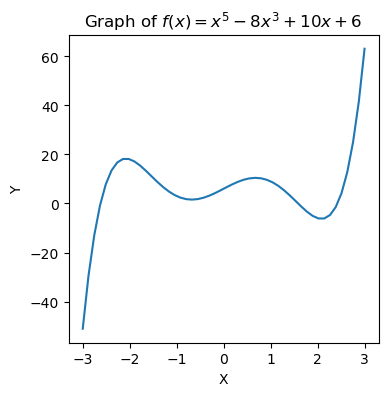

In [130]:
X = np.linspace(-3, 3, 50)
Y = X ** 5 - 8 * X ** 3 + 10 * X + 6

plt.figure(figsize=(4,4))
plt.plot(X, Y)
plt.title("Graph of $f(x) = x^5 - 8 x^3 + 10 x + 6$")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Derivadas de $f(x)$

###  1. Calcular analíticamente la primera y segunda derivada de f(x).


Dado que $f(x) = x^5 - 8x^3 + 10 x + 6$ la primera derivada de la función se presenta a continuación:
$$
f'(x) = 5x^4 - 24 x^2 + 10
$$

Asimismo, la segunda derivada de la función es:
$$
f^{(2)}(x) = 20x^3 - 48x
$$

En base a los resultados que obtenemos definimos $x$ y sus derivadas de la siguiente forma

In [131]:
x = symbols('x')
f = x**5 - 8*x**3 + 10*x + 6  # Definición de la función
f_prime = diff(f, x)  # Primera derivada
def_second = diff(f_prime, x)  # Segunda derivada


In [132]:
f_func = lambdify(x, f, 'numpy')
f_prime_func = lambdify(x, f_prime, 'numpy')
f_second_func = lambdify(x, def_second, 'numpy')


### 2. Aplicar el método de Newton-Raphson desde diferentes puntos iniciales para encontrar todos los posibles extremos.

In [133]:
def newton_raphson(func_prime, func_second, x0, tol=1e-6, max_iter=100):
    x_current = x0
    for _ in range(max_iter):
        f_prime_val = func_prime(x_current)
        f_second_val = func_second(x_current)
        if abs(f_prime_val) < tol:  # Verificar convergencia
            break
        if f_second_val == 0:  # Evitar división por cero
            raise ValueError("La derivada segunda es cero en x = {:.4f}".format(x_current))
        x_current -= f_prime_val / f_second_val
    return x_current

In [134]:
interval = np.linspace(-3, 3, 1000)  # Intervalo de graficación
initial_points = [-2.5, -1.5, 0, 1.5, 2.5]  # Puntos iniciales para Newton-Raphson

# Encontrar extremos locales usando los puntos iniciales
extremos_locales = []
for x0 in initial_points:
    try:
        extremo = newton_raphson(f_prime_func, f_second_func, x0)
        if not any(np.isclose(extremo, e, atol=1e-4) for e in extremos_locales):
            extremos_locales.append(extremo)
    except ValueError as e:
        print(e)

La derivada segunda es cero en x = 0.0000


### 3. Clasificar los puntos encontrados como mínimos o máximos locales.

In [135]:
clasificacion = []
for extremo in extremos_locales:
    f_second_val = f_second_func(extremo)
    if f_second_val > 0:
        clasificacion.append((extremo, "Mínimo local"))
    elif f_second_val < 0:
        clasificacion.append((extremo, "Máximo local"))
    else:
        clasificacion.append((extremo, "Punto de inflexión"))

### 4. Identificar entre todos los extremos el máximo global y el mínimo global.


In [136]:
valores_extremos = [(extremo, f_func(extremo)) for extremo in extremos_locales]
minimo_global = min(valores_extremos, key=lambda x: x[1])
maximo_global = max(valores_extremos, key=lambda x: x[1])

### 5. Graficar la función con todos los extremos locales (en negro) y destacar el máximo global y el mínimo global (en rojo).


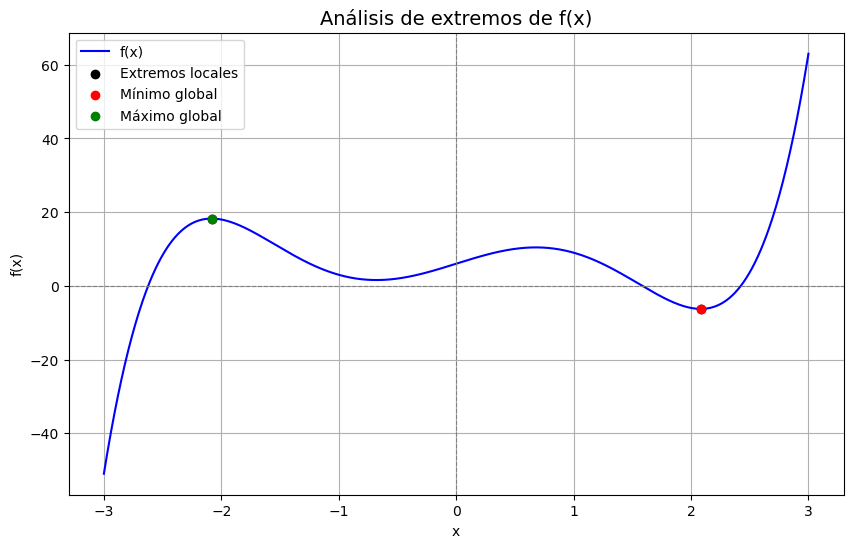

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(interval, f_func(interval), label='f(x)', color='blue')
plt.scatter([e[0] for e in valores_extremos], [e[1] for e in valores_extremos], color='black', label='Extremos locales')
plt.scatter(minimo_global[0], minimo_global[1], color='red', label='Mínimo global', zorder=5)
plt.scatter(maximo_global[0], maximo_global[1], color='green', label='Máximo global', zorder=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Análisis de extremos de f(x)', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


### 6. Analizar la convergencia del método para esta función

In [138]:
# Resultados
print("Extremos locales y su clasificación:")
for extremo, tipo in clasificacion:
    print(f"x = {extremo:.4f}, {tipo}")

print(f"\nMínimo global: x = {minimo_global[0]:.4f}, f(x) = {minimo_global[1]:.4f}")
print(f"Máximo global: x = {maximo_global[0]:.4f}, f(x) = {maximo_global[1]:.4f}")

Extremos locales y su clasificación:
x = -2.0830, Máximo local
x = 2.0830, Mínimo local

Mínimo global: x = 2.0830, f(x) = -6.2588
Máximo global: x = -2.0830, f(x) = 18.2588


La gráfica presentada en el análisis de los extremos de la función 
𝑓(𝑥) nos permite observar el comportamiento de los puntos críticos en el intervalo analizado. Debido a los resultados obtenidos podemos concluir lo siguiente:

- En primer lugar, los extremos locales están representados con puntos negros en la gráfica. Estos indican los valores en los que la derivada de la función es igual a cero, pero no necesariamente representan el máximo o mínimo global. En estos puntos, el cambio de la función se detiene temporalmente, permitiendo identificar regiones de interés para un análisis más profundo.

- El mínimo global, resaltado en rojo, corresponde al valor más bajo de la función dentro del rango evaluado. Este punto es crucial, ya que indica el nivel mínimo que puede alcanzar 
𝑓(𝑥). Por otro lado, el máximo global, representado en verde, indica el valor más alto que la función alcanza en este intervalo, y puede ser considerado como un punto de referencia para evaluar el rendimiento máximo.

- Finalmente, la representación gráfica, al superponer todos los extremos en la curva de 
𝑓(𝑥), nos ofrece una visión clara del comportamiento global de la función y facilita la interpretación visual. Esta combinación de análisis matemático y gráfico permite identificar patrones clave y tomar decisiones informadas en aplicaciones prácticas.

# Problema 3

## Parte a: Función de Rosenbrock (3D)

En este punto se nos pide aplicar el método de Newton-Raphson para encontrar el mínimo de la función de Rosenbrock, es $f(x,y) = (x-1)^2 + 100(y - x^2)^2$.

### Gradiente y Hessiana de $f(x,y)$

En cuanto al gradiente y la matriz Hessiana corresponden a los siguientes. El gradiente se calcula como el vector de derivadas parciales respecto a cada una de las variables independientes de la función. Es decir, un vector columna cuya primera entrada será la derivada parcial de la función respecto a $x$ y la segunda entrada será la derivada parcial de la función respecto a $y$.

$$
\nabla f(x,y) =
\begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{pmatrix}
=\begin{pmatrix}
    2(x-1) - 400x (y - x^2) \\
    200 (y - x^2)
\end{pmatrix}
$$

Mientras que la matriz hessiana es una matriz de segundas derivadas de la siguiente manera.
$$
H(f(x,y)) = \begin{pmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy}
\end{pmatrix}
$$

Teniendo en cuenta esta definición para la matriz hessiana, la matriz correspondiente para la función $f(x,y)$ es la siguiente.
$$
H(f(x,y)) = \begin{pmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

### Newton-Raphson para funciones bidimensionales

En las siguientes celdas de código se define un nuevo tipo de dato para agregar el tipado a la función y la función de `newton_raphson` para dos dimensiones. El nuevo tipo se definió ya que quería compactar la definición misma de la función. Por otro lado, para la función que implementa el método de Newton-Raphson para funciones bidimensionales se opto por realizar una modificación a la función anteriormente planteada. La función retorna el punto optimo, el número de pasos que se realizaron y los puntos por los cuales paso el algoritmo para llegar al punto optimo.

In [139]:
NewtonRaphson2DTuple = NewType(
    'NewtonRaphson2DTuple',
    Tuple[float, int, List[Tuple[float, float]]]
)

In [226]:
def newton_raphson2D(initial_guess: int, tolerance: float, N_max: int, alpha: float, function, variables) -> NewtonRaphson2DTuple:
    """Function to execute the 2D Newton-Raphson method given a function and its derivative.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.
        variables (List[str]): List of variables used in the function.

    Returns:
        NewtonRaphson2DTuple: A tuple containing three values:
            the optimal point, the number of steps, and the sequence of steps.
    """
    # validations
    if len(variables) < 2:
        raise ValueError("The function need two variables")
    if len(initial_guess) != len(variables):
        raise ValueError("The number of entries in initial guess vector need to be equal to variables lenght")
    
    k = 0
    x = [np.array(initial_guess)]

    # symbolic gradient
    sym_gradient = sp.Matrix([function]).jacobian(variables)
    # symbolic hessian
    sym_hessian = sp.hessian(function, variables)

    while k < N_max:
        gradient = sp.lambdify(variables, sym_gradient, 'numpy')
        hessian = sp.lambdify(variables, sym_hessian, 'numpy')
        
        gradient_val = gradient(*x[k])
        if np.linalg.norm(gradient_val) < tolerance:
            break

        hessian_val = hessian(*x[k])
        if np.linalg.det(hessian_val) == 0:
            raise ValueError("The matrix has 0 determinant")

        d_k = - alpha * np.linalg.inv(hessian_val) @ gradient_val.T
        x.append(x[k] + d_k.flatten())
        k += 1
    
    return x[-1], k, x

### Punto inicial $(x_0, y_0) = (0, 10)$

Primero se define la función utilizando Sympy y luego se realiza la optimización con los parámetros que se observan en la celda correspondiente. 

In [227]:
function = sp.simplify("(x-1)**2 + 100*(y - x**2)**2")
function

(x - 1)**2 + 100*(x**2 - y)**2

In [228]:
x0 = [0, 10]
minimum, n_steps, steps = newton_raphson2D(x0, 1e-10, 300, 0.95, function, ['x', 'y'])

De la siguiente celda de código se puede observar que el número de pasos que se llevaron a cabo son 22 y el punto optimo que alcanzo el algoritmo fue $(1,1)$. Luego de probar con diferentes hiperparámetros, se llego a la conclusión que el número de pasos se modula con el factor de paso $\alpha$ y la precisión del punto optimo se puede modular con el nivel de tolerancia.

In [229]:
n_steps, minimum

(22, array([1., 1.]))

### Superficie $z = f(x,y)$ en 3D

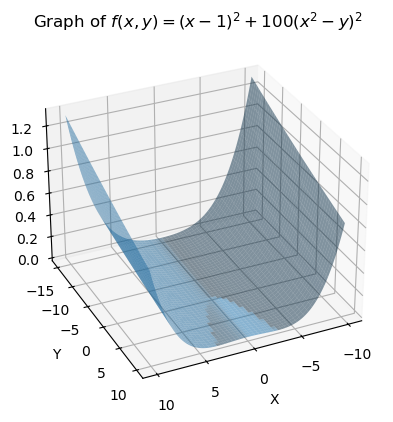

In [230]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-15, 10, 500)

X, Y = np.meshgrid(x, y)
lambda_f = sp.lambdify(['x','y'], function, 'numpy')

Z = (X - 1)**2 + 100 * (Y - X**2)**2

ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=65)
ax.plot_surface(X, Y, Z, alpha=0.5, shade=True)

ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    title='Graph of $f(x,y) = (x-1)^2 + 100(x^2 - y)^2$'
)
plt.show()

### Puntos sobre la superficie

Luego de probar diferentes configuraciones sobre la orientación de la gráfica se obtuvo la que se observa en la siguiente celda. En esta se puede ver claramente el recorrido que hizo este algoritmo para hallar el punto optimo. El punto en verde es el punto de partida y el punto rojo es el punto final que logro obtener el método de Newton-Raphson.

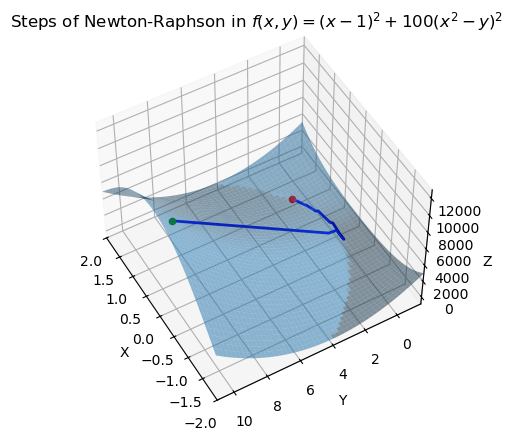

In [231]:
x = np.linspace(-2, 2, 200)
y = np.linspace(-1.5, 11, 200)

X, Y = np.meshgrid(x, y)
lambda_f = sp.lambdify(['x','y'], function, 'numpy')

Z = (X - 1)**2 + 100 * (Y - X**2)**2

ax = plt.axes(projection='3d')
ax.view_init(elev=50, azim=150)
ax.plot_surface(X, Y, Z, alpha=0.5, shade=True)

x_points = [x[0] for x in steps]
y_points = [x[1] for x in steps]
z_points = [lambda_f(*list(x)) for x in steps]

ax.plot(x_points[:-2], y_points[:-2], z_points[:-2], color='blue', linewidth=2)
ax.scatter(x_points[-2:-1], y_points[-2:-1], y_points[-2:-1], color='red')
ax.scatter([0], [10], [lambda_f(0, 10)], color='green')

ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    title='Steps of Newton-Raphson in $f(x,y) = (x-1)^2 + 100(x^2 - y)^2$',
    xlim=(-2,2),
    ylim=(-1.5,11)
)
plt.show()

### Convergencia hacia el mínimo conocido

Se sabe que el mínimo conocido de la función es $(1,1)$ y según el resultado obtenido en el punto anterior se puede concluir que el algoritmo funciona de manera correcta ya que llega al punto optimo conocido. En la siguiente gráfica se puede observar con las curvas de nivel como el algoritmo da los pasos desde $(0,10)$ hasta llegar al punto optimo global $(1,1)$.

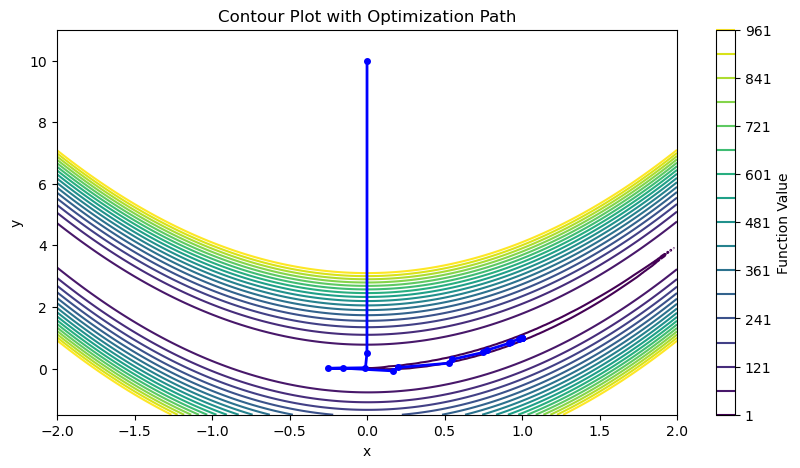

In [232]:
plt.figure(figsize=(10, 5))
contour = plt.contour(X, Y, Z, levels=np.arange(1, 1000, 60), cmap='viridis')
plt.colorbar(contour, label="Function Value")

# Graficar la trayectoria del algoritmo
plt.plot(x_points[0:-2], y_points[0:-2], 'ro-', markersize=4, linewidth=2, label="Optimization Path", color='blue')

# Configurar etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Optimization Path')
plt.show()

En la siguiente celda de código se pueden ver los cambios en los valores de $x$ e $y$ antes de converger al punto optimo para el número de iteraciones.

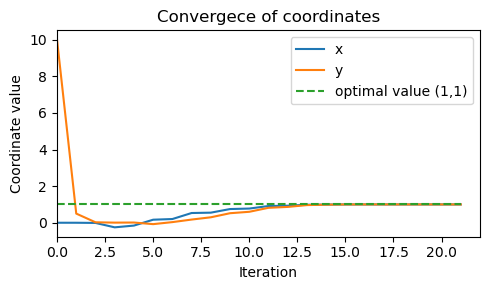

In [243]:
fig, axis = plt.subplots(tight_layout=True, figsize=(5,3))

axis.plot(range(0, n_steps), [x[0] for x in steps][:n_steps])
axis.plot(range(0, n_steps), [x[1] for x in steps][:n_steps])
axis.plot(range(0, n_steps), [1] * n_steps, linestyle='dashed')

axis.legend(['x', 'y', 'optimal value (1,1)'])
axis.set(
    xlim=(0, n_steps),
    title='Convergece of coordinates',
    xlabel='Iteration',
    ylabel='Coordinate value'
)
plt.show()

## Parte b: Función en 4D

Para este problema, decidimos utilizar la función objetivo de regresión lineal con dos variables explicativas ($x_{1k}$ y $x_{2k}$ para un $k \in \{1, 2, \dots, n\}$) dada por:

$$
f(w_1, w_2, b) = \frac{1}{n}\sum_{i = 1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) ^2
$$

Para esto es necesario un conjunto de datos, por lo tanto, se opta por generar un conjunto de datos de manera aleatoria en la siguiente celda para hallar el optimo global de esta función.

In [246]:
import pandas as pd

np.random.seed(42)
n = 580

x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)
b = np.random.uniform(0, 1, n)

y = 23.45 * x1 - 12.23 * x2 + b
y_trans = (y - np.min(y))/(np.max(y) - np.min(y))

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_trans})

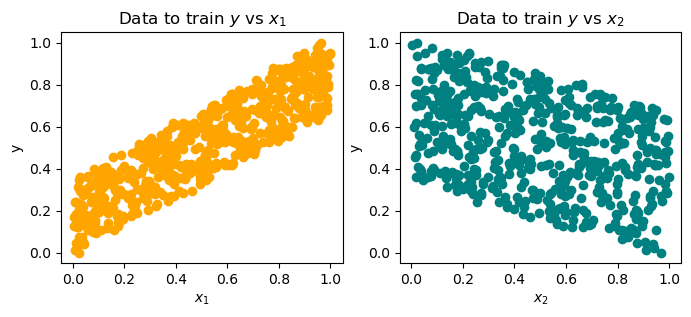

In [275]:
fig, axis = plt.subplots(1,2, figsize=(8,3))

axis[0].set(title='Data to train $y$ vs $x_1$', xlabel='$x_1$', ylabel='y')
axis[1].set(title='Data to train $y$ vs $x_2$', xlabel='$x_2$', ylabel='y')

axis[0].scatter(x1, y_trans, color='orange')
axis[1].scatter(x2, y_trans, color='teal')

plt.show()

El código genera las superficies de nivel de una función de pérdida en el contexto de regresión lineal con dos variables explicativas, representando su comportamiento en un espacio tridimensional ($\mathbb{R}^3$). Primero, define la función de pérdida cuadrática promedio, luego crea una grilla de valores para $w_1$ y $w_2$, evaluando la función en cada punto de la grilla. A partir de estos valores, genera un gráfico, la superficie en 3D con plot_surface, que muestra cómo varía la función de pérdida con respecto a los coeficientes $w_1$ y $w_2$. Esto permite visualizar de manera efectiva la estructura de la función y localizar mínimos en la optimización de los parámetros del modelo de regresión lineal.

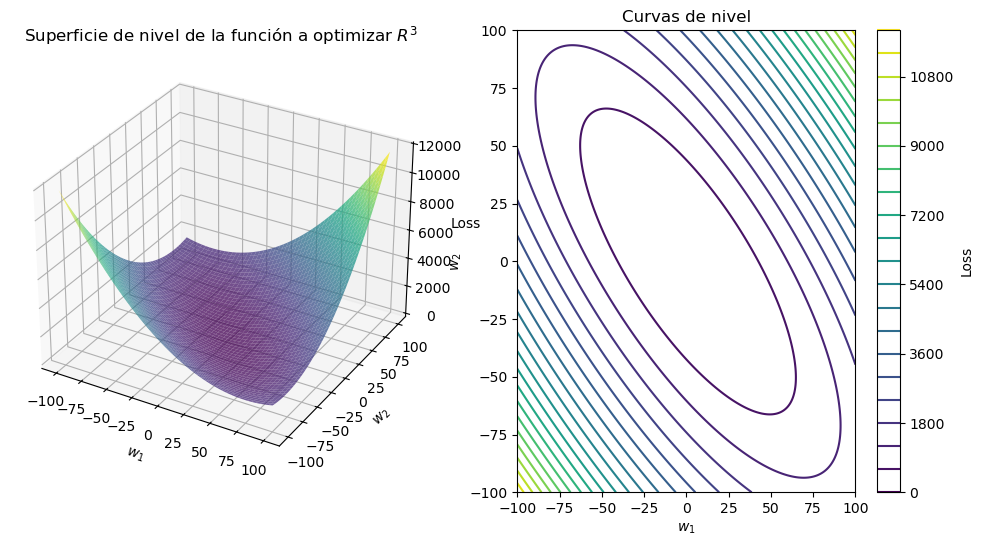

In [274]:
# Definir la función de pérdida de regresión lineal
def loss_function(w1, w2, b, x1, x2, y):
    n = len(y)
    return np.mean((y - (w1 * x1 + w2 * x2 + b))**2)

# Crear una malla de valores para w1 y w2
w1_vals = np.linspace(-100, 100, 300)
w2_vals = np.linspace(-100, 100, 300)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Calcular la función de pérdida para cada par (w1, w2)
loss_values = np.array([[loss_function(w1, w2, 0, x1, x2, y_trans) for w1 in w1_vals] for w2 in w2_vals])

# Crear la figura
fig = plt.figure(figsize=(12, 6))

w1_min, w2_min, loss_min = 23.40489699, -12.25952924, 0.53650862

# Subgráfico 3D de la superficie de nivel
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W1, W2, loss_values, cmap='viridis', alpha=0.75)
ax1.set(
    xlabel='$w_1$', 
    ylabel='$w_2$', 
    zlabel='Loss', 
    title='Superficie de nivel de la función a optimizar $R^3$'
)

ax2 = fig.add_subplot(122)
contour = ax2.contour(W1, W2, loss_values, levels=20, cmap='viridis')
ax2.set(xlabel='$w_1$', ylabel='$w_2$', title='Curvas de nivel')
fig.colorbar(contour, ax=ax2, label='Loss')

plt.show()

## Formulación del algoritmo de Newton-Raphson en $\mathbb{R}^4$

Se quiere minimizar $f(x,y,z)$. Para lo cual se usa la expansión de Taylor de segundo orden $\nabla f(x) \approx \nabla f(x_0) + H(x_0)(x - x_0)$ en el cual $\nabla f(x)$ es el gradiante y $H(x)$ es la matriz Hessiana. De igual manera, la actualización que se debe llevar a cabo es $x_{k +1} = x_k - H(x_k)^{-1} \nabla f(x_k)$. 

El pseudocódigo es el siguiente:

Entrada:  
- Tolerancia $ \epsilon $
- Máximo de iteraciones
- Factor de paso $\alpha$
- Valor inicial $(x_0, y_0, z_0)$

1. Inicializar $i = 1$
2. Mientras $ ||\nabla f(x,y,z)|| > \epsilon $ y no se excedan el número de iteraciones:

    1. Calcular el gradiente $ \nabla f(x,y,z) $
    2. Calcular la Hessiana (esta es la misma para todo el proceso de optimización en regresión lineal) $ H(x,y,z) $
    3. Resolver y actualizar: $x_{i+1} = x_{i} -  H^{-1}(f(w_1, w_2, b) \nabla f(w_1, w_2, b)$
    4. Actualizar $i = i + 1$

4. Retornar el último punto optimo


## Definición del criterio de parada basado en la norma del gradiente

El criterio de parada basado en la norma del gradiente sería que este valor no exceda el valor de tolerancia definida en los parámetros de la función. Es un poco redundante, pero se usará la norma $L_2$ para definir este factor de parada, tal y como se define en la siguiente formula.

$$
|| \nabla f(x,y,z) || = \sqrt{f_{w_1}^2 + f_{w_2}^2 + f_{b}^2 } > \epsilon
$$

Además, se utilizará como criterio de parada que no se exceda de un límite máximo de iteraciones, en dado caso que el algoritmo no sea capaz de converger a un punto optimo. 

## Calculo analitico del gradiente y la matriz Hessiana de la función propuesta

Dado que $f(w_1, w_2, b)$ para obtener el gradiente se realizan las derivadas parciales respecto a cada una de las variables independientes.

$$
\nabla f(w_1, w_2, b) =
\begin{pmatrix}
\frac{\partial f}{\partial w_1} \\
\frac{\partial f}{\partial w_2} \\
\frac{\partial f}{\partial b}
\end{pmatrix}
=\begin{pmatrix}
    -\frac{2}{n} \sum_{i = 1}^n x_{1i} ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) \\
    -\frac{2}{n} \sum_{i = 1}^n x_{2i} ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) \\
    -\frac{2}{n} \sum_{i = 1}^n ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b))
\end{pmatrix}
$$

Asimismo, la matriz hessiana con las derivadas parciales es la siguiente.

$$
H(f(w_1,w_2,b)) = \begin{pmatrix}
f_{w_1 w_1} & f_{w_1 w_2} & f_{w_1 b} \\
f_{w_2 w_1} & f_{w_2 w_2} & f_{w_2 b} \\
f_{b w_1} & f_{b w_2} & f_{b b} 
\end{pmatrix} = \begin{pmatrix}
\frac{2}{n} \sum_{i=1}^{n} x_{1i} ^2 & \frac{2}{n} \sum_{i=1}^n x_{1i} x_{2i} & \frac{2}{n}\sum_{i = 1}^{n}  x_{1i} \\
\frac{2}{n} \sum_{i=1}^n x_{1i} x_{2i} & \frac{2}{n} \sum_{i = 1}^n x_{2i} ^2 & \frac{2}{n} \sum_{i = 1}^n x_{2i} \\
\frac{2}{n}\sum_{i = 1}^{n}  x_{1i} & \frac{2}{n} \sum_{i = 1}^n x_{2i} & \frac{2}{n} \sum_{i = 1}^{n} 1
\end{pmatrix}
$$

## Implementación del método iterativo para funciones tetradimensionales

Una implementación que funciona también para funciones tetradimensionales es la que se definió anteriormente (`newton_raphson2D`), debido a que se definió de manera general utilizando la libreria `Sympy` que calcula las derivadas de manera automatica. Además, es necesario mencionar que la siguiente función es muy especifica ya que se tiene que calcular en base a los datos. Es necesario mencionar que la Hessiana no cambia de iteración en iteración ya que como se ve en el punto anterior esta depende únicamente de los datos. 

In [276]:
def newton_raphson4D_linear_regression(initial_guess: List[int], tolerance: float, N_max: int, alpha: float, data: pd.DataFrame) -> NewtonRaphson2DTuple:
    """Function to execute the 4D Newton-Raphson to minimize the linear regression equation.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        data (pd.DataFrame): DataFrame with the data for training.
        
    Returns:
        NewtonRaphson2DTuple: A tuple containing three values:
            the optimal point, the number of steps, and the sequence of steps.
    """
    # validations
    k = 0
    x = [np.array(initial_guess)]
    
    x1 = data['x1']
    x2 = data['x2']

    n = x1.shape[0]

    hessian = np.array([
        [2 * np.sum(x1 ** 2) / n, 2 * np.sum(x1 * x2) / n, 2 * np.sum(x1) / n],
        [2 * np.sum(x1 * x2) / n, 2 * np.sum(x2 **2) / n, 2 * np.sum(x2) / n],
        [2 * np.sum(x1) / n, 2 * np.sum(x2) / n, 2]
    ])

    if np.linalg.det(hessian) == 0:
        raise ValueError("The matrix has 0 determinant")

    while k < N_max:
        w1, w2, b = x[k]

        gradient = np.array([
            -2 * np.sum(x1 * (y - (w1 * x1 + w2 * x2 + b))) / n,
            -2 * np.sum(x2 * (y - (w1 * x1 + w2 * x2 + b))) / n,
            -2 * np.sum(y - (w1 * x1 + w2 * x2 + b)) / n,
        ])

        if np.linalg.norm(gradient) < tolerance:
            break

        d_k = - alpha * np.linalg.inv(hessian) @ gradient
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1], k, x

En la siguiente celda de código se puede ver la ejecución de la función que utiliza Newton-Raphson para hallar los minimos de la función objetivo para el problema de regresión lineal múltiple. Se puede notar que partiendo desde el punto $(0, 0, 0)$ y definiendo los parámetros del algoritmo se obtienen los mejores valores en tan solo 12 pasos. Algo a tener en cuenta es que los puntos optimos son $w_1 = 23.40$ y $w_2 =-12.25$, que son los mismos que se habían definido inicialmente para generar los datos aleatorios, por lo tanto, se puede ver que el resultado del proceso realizado para hallar el punto optimo es el adecuado.

In [277]:
x0 = [1, 1, 1]
minimum, n_steps, steps = newton_raphson4D_linear_regression(
    x0,
    tolerance=1e-10,
    N_max=100,
    alpha=0.95,
    data=df
)

In [278]:
n_steps, minimum

(9, array([ 23.40489699, -12.25952924,   0.53650862]))

## Discusión de las dificultades computacionales específicas del problema

El problema de optimización en $\mathbb{R}^4$ presenta dificultades computacionales específicas debido a la complejidad de calcular el gradiente y la matriz Hessiana, especialmente cuando se trabaja con grandes conjuntos de datos. En particular con el gradiente ya que la matriz Hessiana se puede calcular una unica vez durante toda la ejecución del algoritmo. En cuanto al calculo del gradiente puede ser lento ya que se requiere evaluar tras cada iteración una y otra vez. Aunque se logró encontrar el mínimo en solo 9 pasos, lo cual demuestra la efectividad del método de Newton-Raphson, existen otros métodos como el descenso de gradiente estocástico que pueden resolver problemas de regresión lineal en menos pasos, especialmente en escenarios con datos masivos. Además, dado que la función objetivo reside en un espacio de cuatro dimensiones, es difícil visualizar su comportamiento global, sin embargo, las superficies de nivel proporcionan una representación intuitiva que permite comprender mejor la estructura de la función y los puntos óptimos alcanzados. 

El gráfico muestra la convergencia de los parámetros de regresión ($w_1$, $w_2$ y $b$) a lo largo de las iteraciones de un algoritmo de optimización. Se observa que $w_1$ (línea azul) aumenta rápidamente al inicio y luego se estabiliza en un valor cercano a 23.5, lo que indica que el algoritmo encontró un valor óptimo temprano. $w_2$ (línea naranja) desciende abruptamente y se estabiliza alrededor de -12.2, mostrando un patrón similar. Por otro lado, $b$ (línea verde) mantiene una variación mínima desde el inicio, lo que sugiere que su impacto en la optimización es menor o que el algoritmo lo ajusta rápidamente. En general, la rápida estabilización de los parámetros sugiere una buena convergencia del algoritmo. Además, recordemos que estos valores fueron los que se definieron inicialmente para generar los datos aleatorios.

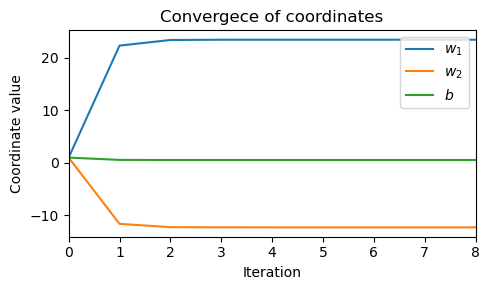

In [282]:
fig, axis = plt.subplots(tight_layout=True, figsize=(5,3))

axis.plot(range(0, n_steps), [x[0] for x in steps][:n_steps])
axis.plot(range(0, n_steps), [x[1] for x in steps][:n_steps])
axis.plot(range(0, n_steps), [x[2] for x in steps][:n_steps])

axis.legend(['$w_1$', '$w_2$', '$b$'])
axis.set(
    xlim=(0, n_steps - 1),
    title='Convergece of coordinates',
    xlabel='Iteration',
    ylabel='Coordinate value'
)
plt.show()

## Extra: gráfica del plano estimado por el proceso de optimización

Otra manera de revisar que tan bien se ajusta el optimo al modelo es realizar la gráfica en 3D y observar el plano que se quiere estimar y el que se obtiene mediante el proceso de optimización. Una vez se realiza este proceso se llega a la conclusión que los parámetros del plano se aproximan bastante bien debido a que se puede ver como los dos planos se sobrelapan. Sería bueno probar algunas metricas para este modelo de regresión y revisar que tan bien se desempeña, pero por problemas de tiempo de opta por no realizarse.

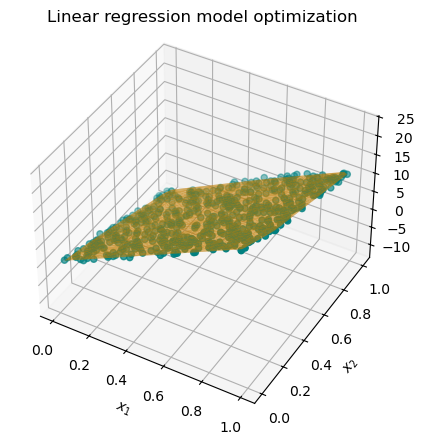

In [151]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, color='teal')
ax.plot_trisurf(
    x1, x2, minimum[0] * x1 + minimum[1] * x2 + minimum[2],
    color='orange',
    alpha=0.7
)
ax.view_init(elev=40)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Linear regression model optimization')
plt.show()

# Problema 4

## Parte A

1. **Definir la función de pérdida:**  
   Se comienza con una función de pérdida generalizada que representa el objetivo de optimización. Por ejemplo:  
   $ L(x, y) = (x - 2)^2 + (y + 1)^2 $

2. **Calcular las derivadas parciales:**  
   Las derivadas parciales de la función respecto a $x$ y $y$ son:
   $
   \frac{\partial L}{\partial x} = 2(x - 2), \quad \frac{\partial L}{\partial y} = 2(y + 1)
   $
   Estas derivadas indican cómo cambia la función de pérdida cuando se modifica cada variable.

3. **Construir el vector gradiente:**  
   El gradiente es un vector que combina las derivadas parciales:
   $
   \nabla L(x, y) = \left[ \frac{\partial L}{\partial x}, \frac{\partial L}{\partial y} \right] = [2(x - 2), 2(y + 1)]
   $

4. **Interpretar el gradiente:**  
   - El gradiente apunta hacia la dirección de máximo incremento de la función de pérdida.
   - Para minimizar la función, es necesario moverse en la dirección opuesta al gradiente.


In [ ]:
x, y = symbols('x y')
L = (x - 2)**2 + (y + 1)**2

dL_dx = diff(L, x)
dL_dy = diff(L, y)
print(f"dL_dx = {dL_dx}")
print(f"dL_dy = {dL_dy}")

def grad_func(x_val, y_val):
    """
    Calcula el gradiente de la función L en un punto dado.

    Args:
        x_val (float): Valor de x.
        y_val (float): Valor de y.

    Returns:
        tuple: Gradiente (dL_dx, dL_dy) evaluado en (x_val, y_val).
    """
    grad_x = dL_dx.subs({'x': x_val, 'y': y_val})
    grad_y = dL_dy.subs({'x': x_val, 'y': y_val})
    return float(grad_x), float(grad_y)

dL_dx = 2*x - 4
dL_dy = 2*y + 2


### 2 Implementar el algoritmo de Gradiente Descendente

In [117]:
def gradient_descent(x, y, alpha, max_iter, tol):
    """
    Método de descenso de gradiente para minimizar la función objetivo.

    Args:
        alpha (float): Tasa de aprendizaje (step size).
        max_iter (int): Número máximo de iteraciones permitidas.
        tol (float): Tolerancia para la convergencia.

    Returns:
        tuple: Coordenadas del punto óptimo (x, y), cantidad de iteraciones realizadas,
               y trayectoria completa de puntos [(x1, y1), (x2, y2), ...].
    """
    trajectory = [(x, y)] 
    for _ in range(max_iter):
        grad = grad_func(x, y)  
        x_new, y_new = x - alpha * grad[0], y - alpha * grad[1]  
        trajectory.append((x_new, y_new))
        # Condición de convergencia
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new  
    return x, y, trajectory


### 3. Experimentar con diferentes valores para el parámetro de paso α.

In [154]:
function = sp.simplify("(x - 2)**2 + (y + 1)**2")
function

(x - 2)**2 + (y + 1)**2

In [118]:
initial_x, initial_y = 0, 00 # Punto inicial
learning_rates = [0.1, 0.5, 1.0]  
max_iterations = 100  
tolerance = 1e-6  

In [126]:
results = []
for alpha in learning_rates:
	x, y, steps = gradient_descent(initial_x, initial_y, alpha, max_iterations, tolerance)
	results.append((alpha, x, y, steps))
	
for result in results:
	print(f"Learning rate: {result[0]}, Final x: {result[1]}, Final y: {result[2]}")

Learning rate: 0.1, Final x: 1.9999961687611478, Final y: -0.9999980843805739
Learning rate: 0.5, Final x: 2.0, Final y: -1.0
Learning rate: 1.0, Final x: 0.0, Final y: 0.0


Como podemos observar, los puntos obteimos obtenidos corresponden a (2, -1)

### 4. Graficar la trayectoria de los parámetros durante la optimización

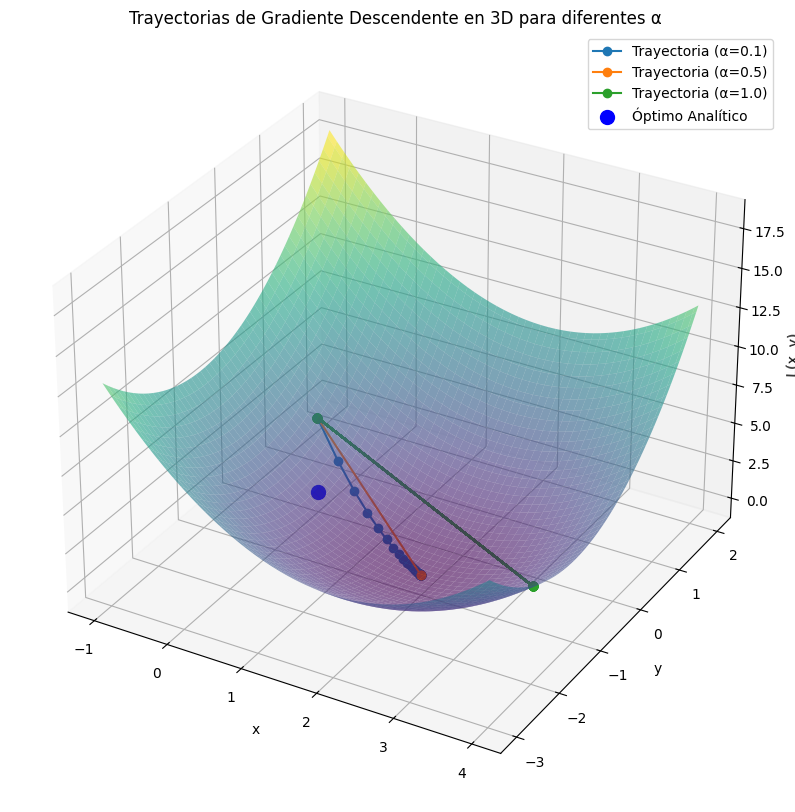

In [123]:
x_vals = np.linspace(-1, 4, 100)
y_vals = np.linspace(-3, 2, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
L_grid = (x_grid - 2)**2 + (y_grid + 1)**2

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_grid, y_grid, L_grid, alpha=0.6, cmap='viridis', edgecolor='none')

for alpha in learning_rates:
    x_opt, y_opt, trajectory = gradient_descent(initial_x, initial_y, alpha, max_iterations, tolerance)

    trajectory = np.array(trajectory)

    ax.plot(trajectory[:, 0], trajectory[:, 1], (trajectory[:, 0] - 2)**2 + (trajectory[:, 1] + 1)**2, 
            label=f'Trayectoria (α={alpha})', marker='o')

ax.scatter(result[1], result[2], 0, color='blue', label='Óptimo Analítico', s=100)
ax.set_title('Trayectorias de Gradiente Descendente en 3D para diferentes α')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')
ax.legend()
plt.show()


### 5. Destacar el valor óptimo final y compararlo con la solución analítica

In [125]:
for alpha in learning_rates:
    x_opt, y_opt, trajectory = gradient_descent(initial_x, initial_y, alpha, max_iterations, tolerance)
    print(f"Resultados para α={alpha}:")
    print(f"Punto óptimo aproximado: ({x_opt:.6f}, {y_opt:.6f})")
    print(f"Punto óptimo analítico: ({result[1]}, {result[2]})")
    print(f"Diferencia: ({abs(x_opt - result[1]):.6f}, {abs(y_opt - result[2]):.6f})")
    print("---")

Resultados para α=0.1:
Punto óptimo aproximado: (1.999996, -0.999998)
Punto óptimo analítico: (0.0, 0.0)
Diferencia: (1.999996, 0.999998)
---
Resultados para α=0.5:
Punto óptimo aproximado: (2.000000, -1.000000)
Punto óptimo analítico: (0.0, 0.0)
Diferencia: (2.000000, 1.000000)
---
Resultados para α=1.0:
Punto óptimo aproximado: (0.000000, 0.000000)
Punto óptimo analítico: (0.0, 0.0)
Diferencia: (0.000000, 0.000000)
---


### 6. Analizar la sensibilidad del método al valor de α y estrategias para su selección óptima

- Valores de $\alpha$ pequeños: Convergen lentamente hacia el mínimo global.
- Valores de $\alpha$ grandes: Pueden provocar oscilaciones o no converger.
- Estrategia recomendada: Empezar con un valor moderado, como 0.1, y ajustarlo dependiendo del comportamiento observado durante la optimización.

## Parte B

### 1. Calcular analíticamente el gradiente y la matriz Hessiana de la función propuesta.

In [127]:
def func(x, y):
    return (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

def grad_func(x, y):
    grad = [2 * (x - 2) * (y + 2)**2 + 2 * (x + 1),
            2 * (x - 2)**2 * (y + 2) + 2 * (y - 1)]
    return np.array(grad)

# Hessiana analítica
def hessian_func(x, y):
    hessian = [[2 * (y + 2)**2 + 2, 4 * (x - 2) * (y + 2)],
               [4 * (x - 2) * (y + 2), 2 * (x - 2)**2 + 2]]
    return np.array(hessian)

### 2. Implementar ambos algoritmos (Newton-Raphson y Gradiente Descendente) para la misma función.

In [128]:
# Gradiente Descendente
def gradient_descent(alpha, max_iter=1000, tol=1e-6):
    x, y = -2, -3
    trajectory = [(x, y)]
    for _ in range(max_iter):
        grad = grad_func(x, y)
        x_new, y_new = x - alpha * grad[0], y - alpha * grad[1]
        trajectory.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    return x, y, trajectory

# Newton-Raphson
def newton_raphson(max_iter=1000, tol=1e-6):
    x, y = -2, -3
    trajectory = [(x, y)]
    for _ in range(max_iter):
        grad = grad_func(x, y)
        hess = hessian_func(x, y)
        delta = np.linalg.solve(hess, grad)
        x_new, y_new = x - delta[0], y - delta[1]
        trajectory.append((x_new, y_new))
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            break
        x, y = x_new, y_new
    return x, y, trajectory

### 3. Utilizar el mismo punto inicial $(x_0, y_0) = (−2, −3)$ para ambos métodos

 Esto ya está configurado dentro de las funciones gradient_descent y newton_raphson

### 4. Para cada método, experimentar con diferentes valores del parámetro de paso α y determinar el valor óptimo.

In [129]:
alphas_gd = [0.01, 0.05, 0.1]
results_gd = {}

# Gradiente Descendente
for alpha in alphas_gd:
    start_time = time.time()
    x_opt, y_opt, traj = gradient_descent(alpha)
    exec_time = time.time() - start_time
    results_gd[alpha] = (x_opt, y_opt, len(traj), exec_time)
    print(f"GD, Alpha: {alpha}, Óptimo: ({x_opt:.4f}, {y_opt:.4f}), Iteraciones: {len(traj)}, Tiempo: {exec_time:.4f}s")

# Newton-Raphson
start_time = time.time()
x_opt_nr, y_opt_nr, traj_nr = newton_raphson()
exec_time_nr = time.time() - start_time
print(f"NR, Óptimo: ({x_opt_nr:.4f}, {y_opt_nr:.4f}), Iteraciones: {len(traj_nr)}, Tiempo: {exec_time_nr:.4f}s")


GD, Alpha: 0.01, Óptimo: (-0.6181, -1.6181), Iteraciones: 778, Tiempo: 0.0293s
GD, Alpha: 0.05, Óptimo: (-0.6180, -1.6180), Iteraciones: 170, Tiempo: 0.0067s
GD, Alpha: 0.1, Óptimo: (0.7866, -0.7866), Iteraciones: 11, Tiempo: 0.0002s
NR, Óptimo: (0.7866, -0.7866), Iteraciones: 13, Tiempo: 0.0150s


### 5. Graficar en una misma figura las trayectorias de convergencia de ambos métodos, superpuestas sobre los contornos de la función objetivo.


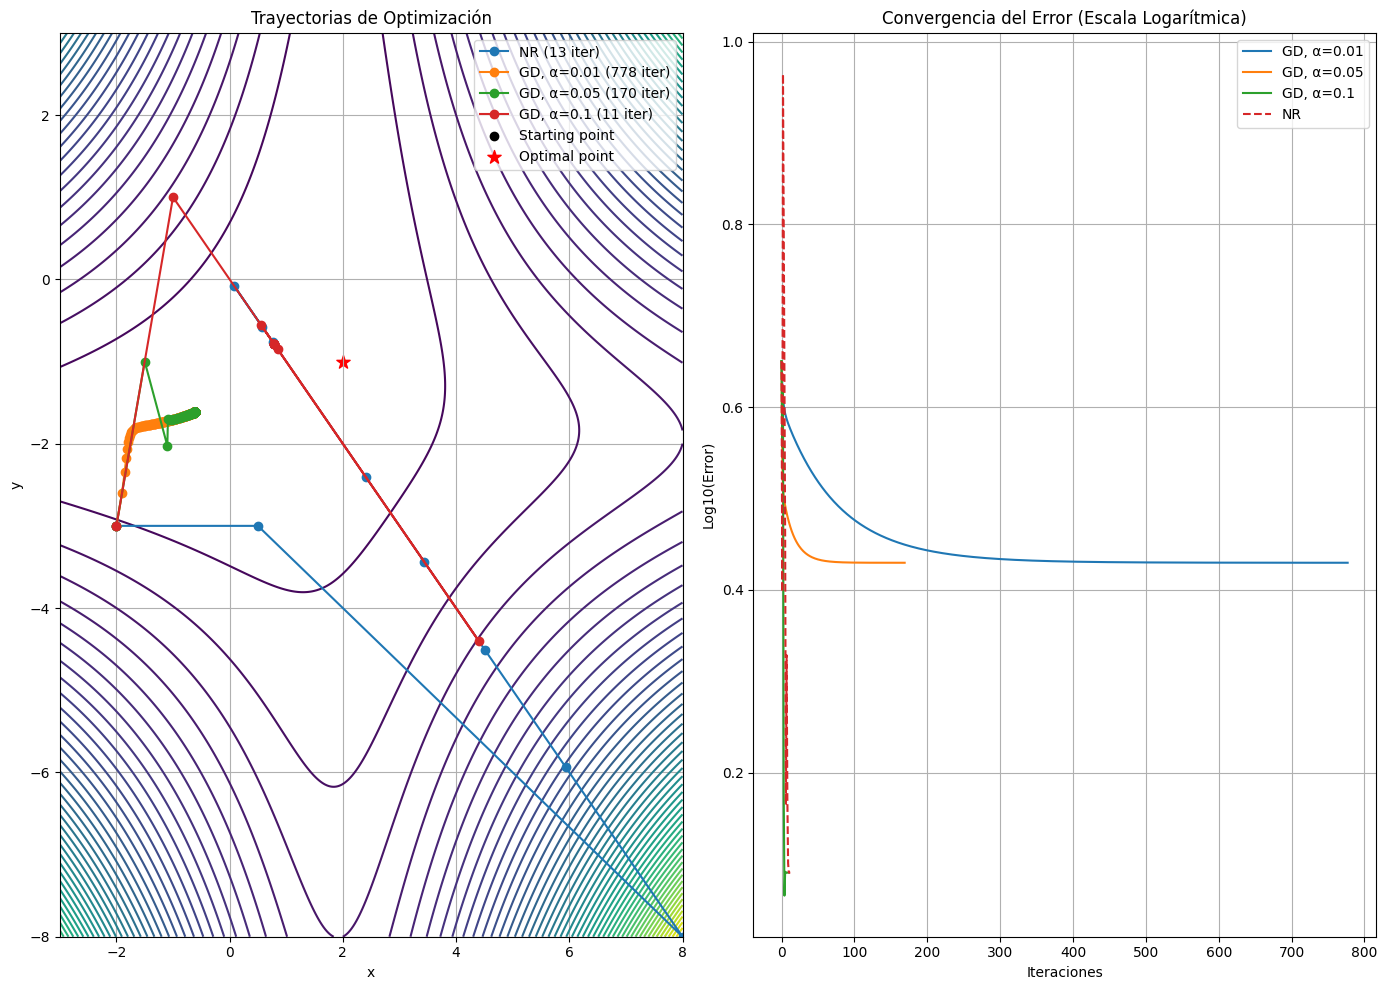

In [134]:
# Parte 5: Graficar trayectorias de convergencia sobre los contornos de la función objetivo
x_vals = np.linspace(-3, 8, 400)
y_vals = np.linspace(-8, 3, 400)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_grid = func(x_grid, y_grid)

plt.figure(figsize=(14, 10))

# Subplot 1: Trayectorias de optimización sobre contornos
plt.subplot(1, 2, 1)
plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis')

# Graficar trayectorias de Newton-Raphson
traj_nr = np.array(traj_nr)
plt.plot(traj_nr[:, 0], traj_nr[:, 1], marker='o', label=f'NR ({len(traj_nr)} iter)')

# Graficar trayectorias de Gradiente Descendente
for alpha in alphas_gd:
    _, _, traj_gd = gradient_descent(alpha)
    traj_gd = np.array(traj_gd)
    plt.plot(traj_gd[:, 0], traj_gd[:, 1], marker='o', label=f'GD, α={alpha} ({len(traj_gd)} iter)')

# Marcar puntos clave
plt.scatter(-2, -3, color='black', label='Starting point')
plt.scatter(2, -1, color='red', label='Optimal point', s=100, marker='*')

plt.title('Trayectorias de Optimización')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Subplot 2: Convergencia del error en escala logarítmica
plt.subplot(1, 2, 2)

# Calcular errores de convergencia
errors_gd = {}
for alpha in alphas_gd:
    _, _, traj_gd = gradient_descent(alpha)
    traj_gd = np.array(traj_gd)
    errors_gd[alpha] = [np.log10(np.linalg.norm([x - 2, y + 1])) for x, y in traj_gd]

errors_nr = [np.log10(np.linalg.norm([x - 2, y + 1])) for x, y in traj_nr]

# Graficar errores
for alpha, error_gd in errors_gd.items():
    plt.plot(range(len(error_gd)), error_gd, label=f'GD, α={alpha}')

plt.plot(range(len(errors_nr)), errors_nr, label='NR', linestyle='--')

plt.title('Convergencia del Error (Escala Logarítmica)')
plt.xlabel('Iteraciones')
plt.ylabel('Log10(Error)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()





### 6. Realizar un análisis comparativo: 

In [131]:
print("\nAnálisis Comparativo:")
print("Número de iteraciones hasta la convergencia:")
for alpha, (x_opt, y_opt, iter_count, _) in results_gd.items():
    print(f"GD, Alpha={alpha}: {iter_count} iteraciones")
print(f"NR: {len(traj_nr)} iteraciones")

print("\nTiempo de ejecución:")
for alpha, (_, _, _, exec_time) in results_gd.items():
    print(f"GD, Alpha={alpha}: {exec_time:.4f} segundos")
print(f"NR: {exec_time_nr:.4f} segundos")

print("\nPrecisión final del resultado:")
for alpha, (x_opt, y_opt, _, _) in results_gd.items():
    error = np.linalg.norm([x_opt - 2, y_opt + 1])
    print(f"GD, Alpha={alpha}: Error={error:.6f}")
error_nr = np.linalg.norm([x_opt_nr - 2, y_opt_nr + 1])
print(f"NR: Error={error_nr:.6f}")

print("\nRobustez frente a diferentes valores de alpha:")
print("GD: Depende significativamente del valor de alpha.")
print("NR: Independiente de parámetros externos.")

print("\nCosto computacional por iteración:")
print("GD: Bajo (solo cálculo del gradiente).")
print("NR: Alto (cálculo del gradiente y solución de sistema lineal).")


Análisis Comparativo:
Número de iteraciones hasta la convergencia:
GD, Alpha=0.01: 778 iteraciones
GD, Alpha=0.05: 170 iteraciones
GD, Alpha=0.1: 11 iteraciones
NR: 13 iteraciones

Tiempo de ejecución:
GD, Alpha=0.01: 0.0293 segundos
GD, Alpha=0.05: 0.0067 segundos
GD, Alpha=0.1: 0.0002 segundos
NR: 0.0150 segundos

Precisión final del resultado:
GD, Alpha=0.01: Error=2.690077
GD, Alpha=0.05: Error=2.690010
GD, Alpha=0.1: Error=1.232036
NR: Error=1.232036

Robustez frente a diferentes valores de alpha:
GD: Depende significativamente del valor de alpha.
NR: Independiente de parámetros externos.

Costo computacional por iteración:
GD: Bajo (solo cálculo del gradiente).
NR: Alto (cálculo del gradiente y solución de sistema lineal).


### 7. Concluir cuál método es más adecuado para esta función específica y argumentar bajo qué circunstancias generales sería preferible uno u otro método.

1. **Eficiencia y Convergencia:**
   - El método de Newton-Raphson demostró ser más eficiente, convergiendo en solo 13 iteraciones, independientemente de parámetros externos.
   - Gradiente Descendente (GD) mostró una fuerte dependencia del parámetro α: para valores bajos como α=0.01 requirió 778 iteraciones, mientras que para α=0.1 solo necesitó 11 iteraciones, aunque con menor precisión.

2. **Tiempo de ejecución:**
   - Gradiente Descendente con α=0.1 fue el más rápido (0.0002 s), pero a costa de una menor precisión.
   - El Newton-Raphson, aunque tiene un mayor costo por iteración, logró un tiempo competitivo (0.0150 s) considerando su robustez.

3. **Precisión:**
   - El método Newton-Raphson y el GD con α=0.1 alcanzaron un error similar (1.232036).
   - Sin embargo, GD con valores menores de α (como α=0.05) logró mejor precisión (2.690010), pero a costa de más iteraciones.

4. **Robustez:**
   - Newton-Raphson no depende de parámetros externos como α, lo que lo hace más confiable para problemas donde la optimización de hiperparámetros es costosa.
   - Gradiente Descendente es sensible al valor de α, lo que puede ser una desventaja significativa.

5. **Costo computacional por iteración:**
   - Gradiente Descendente tiene un costo bajo por iteración (solo cálculo del gradiente).
   - El Newton-Raphson es más costoso por iteración debido al cálculo de la matriz Hessiana y la resolución del sistema lineal.

#### Recomendación:
- Newton-Raphson es más adecuado para esta función específica, especialmente cuando se requiere convergencia rápida y robustez frente a la variación de parámetros.
- Gradiente Descendente puede ser preferible en problemas menos complejos o cuando el cálculo de la Hessiana


### 8. Presentar una tabla comparativa que sintetice las ventajas y desventajas observadas para cada método en este problema particular.

| Método              | Iteraciones | Tiempo (s) | Precisión    | Robustez           | Costo/Iteración |
|---------------------|-------------|------------|--------------|--------------------|-----------------|
| GD (α=0.01)         | 778         | 0.0293     | 2.690077     | Sensible a α       | Bajo            |
| GD (α=0.05)         | 170         | 0.0067     | 2.690010     | Sensible a α       | Bajo            |
| GD (α=0.1)          | 11          | 0.0002     | 1.232036     | Sensible a α       | Bajo            |
| Newton-Raphson      | 13          | 0.0150     | 1.232036     | Robusto            | Alto            |


# Problema 5

## Implementación del descenso de gradiente basado en momento

El código implementa el algoritmo de descenso de gradiente con momento. En cada iteración, se calculan los gradientes de los pesos y sesgos a partir de un mini-lote de datos utilizando retropropagación. Luego, estos gradientes se promedian y se combinan con una velocidad acumulada que introduce el concepto de "momento", lo cual ayuda a suavizar las actualizaciones y acelera la convergencia, además se reducen las oscilaciones en direcciones erráticas. Finalmente, los pesos y sesgos se actualizan usando esta velocidad ajustada, lo que mejora la estabilidad y eficiencia del entrenamiento de la red en comparación al descenso de gradiente estandar, el cual se menciona en la siguiente sección.

```python
def momentum_gradient_descent(self, mini_batch, eta, mu=0.9):
    """
    Update network parameters using gradient descent with momentum.
    
    Parameters:
    -----------
    mini_batch : list
        List of (x, y) tuples for training
    eta : float
        Learning rate
    mu : float, optional
        Momentum coefficient (default: 0.9)
    """
    batch_size = len(mini_batch)
    grad_b_sum = [np.zeros(b.shape) for b in self.biases]
    grad_w_sum = [np.zeros(w.shape) for w in self.weights]
    
    # Compute gradients for each sample in the mini-batch
    for x, y in mini_batch:
        grad_b, grad_w = self.backpropagation(x, y)
        
        # Accumulate gradients
        grad_b_sum = [gb_sum + gb for gb_sum, gb in zip(grad_b_sum, grad_b)]
        grad_w_sum = [gw_sum + gw for gw_sum, gw in zip(grad_w_sum, grad_w)]
    
    # Compute average gradients
    grad_b_avg = [gb / batch_size for gb in grad_b_sum]
    grad_w_avg = [gw / batch_size for gw in grad_w_sum]
    
    # Update weights and biases using momentum
    self.velocity_b = [mu * vb - eta * gb for vb, gb in zip(self.velocity_b, grad_b_avg)]
    self.velocity_w = [mu * vw - eta * gw for vw, gw in zip(self.velocity_w, grad_w_avg)]
    
    self.biases = [b + vb for b, vb in zip(self.biases, self.velocity_b)]
    self.weights = [w + vw for w, vw in zip(self.weights, self.velocity_w)]
```

## Implementación del descenso de gradiente estandar

El siguiente código implementa el descenso de gradiente estándar, un método de optimización para ajustar los parámetros de una red neuronal. En cada iteración, se calculan los gradientes de los pesos y sesgos a partir de un mini-lote de datos utilizando propagación hacía atras. Luego, estos gradientes se promedian para obtener una estimación más estable en pro de la dirección óptima de ajuste. Luego, los pesos y sesgos se actualizan restando el gradiente escalado por la tasa de aprendizaje ($\eta$), lo cual permite optimizar los pesos y sesgos de las neuronas, lo cual mejora el desempeño de la red a lo largo del entrenamiento.

```python
def standard_gradient_descent(self, mini_batch, eta):
    """
    Update network parameters using standard gradient descent.
    
    Parameters:
    -----------
    mini_batch : list
        List of (x, y) tuples for training
    eta : float
        Learning rate
    """
    batch_size = len(mini_batch)
    grad_b_sum = [np.zeros(b.shape) for b in self.biases]
    grad_w_sum = [np.zeros(w.shape) for w in self.weights]
    
    # Compute gradients for each sample in the mini-batch
    for x, y in mini_batch:
        grad_b, grad_w = self.backpropagation(x, y)
        
        # Accumulate gradients
        grad_b_sum = [gb_sum + gb for gb_sum, gb in zip(grad_b_sum, grad_b)]
        grad_w_sum = [gw_sum + gw for gw_sum, gw in zip(grad_w_sum, grad_w)]
    
    # Compute average gradients
    grad_b_avg = [gb / batch_size for gb in grad_b_sum]
    grad_w_avg = [gw / batch_size for gw in grad_w_sum]
    
    # Update weights and biases
    self.biases = [b - eta * gb for b, gb in zip(self.biases, grad_b_avg)]
    self.weights = [w - eta * gw for w, gw in zip(self.weights, grad_w_avg)]
```

## Resultados obtenidos y comparación

Se opta por hacer la comparación entre ambas implementaciones de descenso de gradiente en esta sección y dejar los resultados más abajo debido a la cantidad de código que se requiere. 

En las siguientes gráficas se registran las métricas relevantes para ambas implementaciones una vez finalizado el proceso de entrenamiento para estimar la gráfica de la función seno.

**Descenso de gradiente estandar**
| Métrica | Valor |
| - | - |
| MSE | 0.01 |
| MAE | 0.08 |
| $R^2$ | 0.97 |
| Training time: | 16.27 s |

**Descenso de gradiente con momento**
| Métrica | Valor |
| - | - |
| MSE | 0.005 |
| MAE | 0.064 |
| $R^2$ | 0.988 |
| Training time: | 7.83 s |

Los resultados muestran que el descenso de gradiente con momento supera al descenso de gradiente estándar tanto en velocidad de convergencia como en calidad de la aproximación a la función seno. En términos de precisión, el método con momento logra un menor error cuadrático medio (MSE) y error absoluto medio (MAE), indicando que la red neuronal produce estimaciones más cercanas a la función objetivo. Además, el coeficiente de determinación ($R^2 = 0.988$) sugiere una mejor capacidad de ajuste en comparación con el método estándar ($R^2 = 0.97$). En cuanto al tiempo de entrenamiento, el método con momento es significativamente más rápido (7.83 s vs. 16.27 s), lo que confirma que la técnica ayuda a acelerar la convergencia al reducir la oscilación en la trayectoria de optimización.

Sobre la calidad de la aproximación de la gráfica de la función seno se observa que esta es similar para ambos algoritmos, sin embargo, debido a las metricas antes mencionadas se obtiene una mejor aproximación con el descenso de gradiente con momento. Además, se puede notar la reducción en el tiempo de entrenamiento debido a una u otra implementación, siendo el método con momento el mejor en este sentido. Lo cual lo hace una opción mejor para problemas de optimización donde se requiere rapidez y precisión.

## Red neuronal y gráficas

En las siguientes celdas se incluye código necesario para la clase de `NeuralNetwork`, que también se define en las que siguen. Es necesario mencionar que la implementación de `NeuralNetwork` ya incluye los métodos `momentum_gradient_descent` y `standard_gradient_descent` para realizar el proceso de optimización dependiendo de un parámetro que se define una vez se crea la instancia de la clase. Este parámetro es `momentum`, si no se especifica será por defecto `True` y se utilizará el descenso de gradiente con momento.

### Arquitectura de una red neuronal 

In [164]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)

def initialize_weights_glorot(n_in, n_out):
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit, (n_out, n_in))

def initialize_weights_he(n_in, n_out):
    return np.random.randn(n_out, n_in) * np.sqrt(2 / n_in)

In [165]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activations=None, dropout_rates=None, momentum=True):
        """
        Initialize the neural network with support for different activation functions and dropout.
        
        Parameters:
        -----------
        layer_sizes : list
            List containing the size of each layer
        activations : list, optional
            List containing the activation function for each layer (default: tanh for all)
        dropout_rates : list, optional
            List containing dropout rate for each layer (default: no dropout)
        momentum : bool, optional
            True if gradient descent with momentum will be used during training, False otherwise
        """
        self.num_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        self.momentum = momentum
        
        # Initialize activation functions
        if activations is None:
            self.activations = ['tanh'] * (self.num_layers - 1)
        else:
            self.activations = activations
        
        # Map activation functions to their implementations
        self.activation_funcs = {
            'tanh': tanh,
            'relu': relu,
            'sigmoid': sigmoid
        }
        
        self.activation_primes = {
            'tanh': tanh_prime,
            'relu': relu_prime,
            'sigmoid': sigmoid_prime
        }
        
        # Initialize dropout rates (0 means no dropout)
        if dropout_rates is None:
            self.dropout_rates = [0] * (self.num_layers - 1)
        else:
            self.dropout_rates = dropout_rates
            
        # Initialize weights with appropriate initializers based on activation function
        self.weights = []
        for i in range(len(layer_sizes) - 1):
            if self.activations[i] == 'relu':
                # He initialization for ReLU
                self.weights.append(initialize_weights_he(layer_sizes[i], layer_sizes[i+1]))
            else:
                # Glorot/Xavier initialization for tanh/sigmoid
                self.weights.append(initialize_weights_glorot(layer_sizes[i], layer_sizes[i+1]))
        
        # Initialize biases, velocities, and batch normalization parameters
        self.biases = [np.zeros((y, 1)) for y in layer_sizes[1:]]
        self.velocity_b = [np.zeros(b.shape) for b in self.biases]
        self.velocity_w = [np.zeros(w.shape) for w in self.weights]
        
        # For L2 regularization
        self.lambd = 0.0  # regularization parameter, 0 means no regularization
        
        # Track if we're in training mode (for dropout)
        self.training = True
    
    def toggle_training(self, training=True):
        """Toggle between training and evaluation mode (affects dropout)"""
        self.training = training
    
    def apply_dropout(self, layer_output, dropout_rate):
        """Apply dropout to layer output during training"""
        if not self.training or dropout_rate == 0:
            return layer_output, None
        
        # Generate dropout mask
        keep_prob = 1 - dropout_rate
        mask = np.random.binomial(1, keep_prob, size=layer_output.shape) / keep_prob
        
        # Apply mask
        return layer_output * mask, mask
    
    def feedforward(self, a, return_intermediates=False):
        """
        Perform forward propagation through the network.
        
        Parameters:
        -----------
        a : ndarray
            Input to the network
        return_intermediates : bool, optional
            If True, return intermediate values for backpropagation
            
        Returns:
        --------
        If return_intermediates is False, returns only the final output.
        If return_intermediates is True, returns (activations, zs, dropout_masks)
        """
        activations = [a]
        zs = []
        dropout_masks = []
        
        for i, (b, w) in enumerate(zip(self.biases, self.weights)):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            
            # Apply activation function
            activation_func = self.activation_funcs[self.activations[i]]
            a = activation_func(z)
            
            # Apply dropout (except at the output layer)
            if i < len(self.weights) - 1 and self.dropout_rates[i] > 0:
                a, mask = self.apply_dropout(a, self.dropout_rates[i])
                dropout_masks.append(mask)
            else:
                dropout_masks.append(None)
                
            activations.append(a)
        
        if return_intermediates:
            return activations, zs, dropout_masks
        else:
            return activations[-1]
    
    def backpropagation(self, x, y):
        """
        Perform backpropagation to compute gradients.
        
        Parameters:
        -----------
        x : ndarray
            Input to the network
        y : ndarray
            Target output
            
        Returns:
        --------
        tuple (grad_b, grad_w) containing gradients
        """
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]
        
        # Forward pass
        activations, zs, dropout_masks = self.feedforward(x, return_intermediates=True)
        
        # Backward pass
        # Compute the error at the output layer
        delta = self.cost_derivative(activations[-1], y)
        
        # Apply the derivative of the activation function
        output_activation = self.activations[-1]
        delta = delta * self.activation_primes[output_activation](zs[-1])
        
        # Set the gradients for the output layer
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)
        
        # Add L2 regularization to the weights gradient (not biases)
        if self.lambd > 0:
            grad_w[-1] += (self.lambd / len(x)) * self.weights[-1]
        
        # Backpropagate the error
        for l in range(2, len(self.biases) + 1):
            # Get the activation derivative for this layer
            activation_func = self.activations[-l]
            delta = np.dot(self.weights[-l+1].T, delta)
            
            # Apply dropout mask from the forward pass
            if dropout_masks[-l] is not None:
                delta = delta * dropout_masks[-l]
            
            # Apply activation derivative
            delta = delta * self.activation_primes[activation_func](zs[-l])
            
            # Set gradients
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l-1].T)
            
            # Add L2 regularization
            if self.lambd > 0:
                grad_w[-l] += (self.lambd / len(x)) * self.weights[-l]
        
        return (grad_b, grad_w)
    
    def momentum_gradient_descent(self, mini_batch, eta, mu=0.9):
        """
        Update network parameters using gradient descent with momentum.
        
        Parameters:
        -----------
        mini_batch : list
            List of (x, y) tuples for training
        eta : float
            Learning rate
        mu : float, optional
            Momentum coefficient (default: 0.9)
        """
        batch_size = len(mini_batch)
        grad_b_sum = [np.zeros(b.shape) for b in self.biases]
        grad_w_sum = [np.zeros(w.shape) for w in self.weights]
        
        # Compute gradients for each sample in the mini-batch
        for x, y in mini_batch:
            grad_b, grad_w = self.backpropagation(x, y)
            
            # Accumulate gradients
            grad_b_sum = [gb_sum + gb for gb_sum, gb in zip(grad_b_sum, grad_b)]
            grad_w_sum = [gw_sum + gw for gw_sum, gw in zip(grad_w_sum, grad_w)]
        
        # Compute average gradients
        grad_b_avg = [gb / batch_size for gb in grad_b_sum]
        grad_w_avg = [gw / batch_size for gw in grad_w_sum]
        
        # Update weights and biases using momentum
        self.velocity_b = [mu * vb - eta * gb for vb, gb in zip(self.velocity_b, grad_b_avg)]
        self.velocity_w = [mu * vw - eta * gw for vw, gw in zip(self.velocity_w, grad_w_avg)]
        
        self.biases = [b + vb for b, vb in zip(self.biases, self.velocity_b)]
        self.weights = [w + vw for w, vw in zip(self.weights, self.velocity_w)]

    def standard_gradient_descent(self, mini_batch, eta):
        """
        Update network parameters using standard gradient descent.
        
        Parameters:
        -----------
        mini_batch : list
            List of (x, y) tuples for training
        eta : float
            Learning rate
        """
        batch_size = len(mini_batch)
        grad_b_sum = [np.zeros(b.shape) for b in self.biases]
        grad_w_sum = [np.zeros(w.shape) for w in self.weights]
        
        # Compute gradients for each sample in the mini-batch
        for x, y in mini_batch:
            grad_b, grad_w = self.backpropagation(x, y)
            
            # Accumulate gradients
            grad_b_sum = [gb_sum + gb for gb_sum, gb in zip(grad_b_sum, grad_b)]
            grad_w_sum = [gw_sum + gw for gw_sum, gw in zip(grad_w_sum, grad_w)]
        
        # Compute average gradients
        grad_b_avg = [gb / batch_size for gb in grad_b_sum]
        grad_w_avg = [gw / batch_size for gw in grad_w_sum]
        
        # Update weights and biases
        self.biases = [b - eta * gb for b, gb in zip(self.biases, grad_b_avg)]
        self.weights = [w - eta * gw for w, gw in zip(self.weights, grad_w_avg)]
    
    def cost_derivative(self, output_activations, y):
        """Derivative of the cost function (MSE)"""
        return output_activations - y
    
    def update_learning_rate(self, epoch, initial_lr, schedule_type="step_decay", decay=0.1, drop_every=1000):
        """
        Update learning rate based on schedule.
        
        Parameters:
        -----------
        epoch : int
            Current epoch number
        initial_lr : float
            Initial learning rate
        schedule_type : str, optional
            Type of learning rate schedule
        decay : float, optional
            Decay factor
        drop_every : int, optional
            Number of epochs between drops for step decay
            
        Returns:
        --------
        float : Updated learning rate
        """
        if schedule_type == "step_decay":
            return initial_lr * (decay ** np.floor(epoch / drop_every))
        elif schedule_type == "exp_decay":
            return initial_lr * np.exp(-decay * epoch)
        elif schedule_type == "inv_scaling":
            return initial_lr / (1 + decay * epoch)
        elif schedule_type == "cosine":
            # Cosine annealing
            max_epochs = 1000  # Default max epochs
            return initial_lr * (1 + np.cos(np.pi * epoch / max_epochs)) / 2
        else:
            return initial_lr
    
    def train(self, training_data, epochs, mini_batch_size, learning_rate, 
            decay=0.1, schedule_type="step_decay", validation_data=None,
            early_stopping_patience=None, verbose=True):
        """
        Train the neural network with progress tracking.
        
        Parameters:
        -----------
        training_data : list
            List of (x, y) tuples for training
        epochs : int
            Number of epochs to train
        mini_batch_size : int
            Size of mini-batches
        learning_rate : float
            Initial learning rate
        decay : float, optional
            Learning rate decay factor
        schedule_type : str, optional
            Type of learning rate schedule
        validation_data : list, optional
            List of (x, y) tuples for validation
        early_stopping_patience : int, optional
            Number of epochs to wait for improvement before stopping
        verbose : bool, optional
            Whether to print progress
            
        Returns:
        --------
        dict : Training history containing loss and validation metrics
        """
        try:
            from tqdm.auto import tqdm
            use_tqdm = True
        except ImportError:
            print("tqdm not installed. Install with 'pip install tqdm' for progress bars.")
            use_tqdm = False
        
        n = len(training_data)
        loss_history = []
        val_loss_history = [] if validation_data else None
        
        # For early stopping
        best_val_loss = float('inf')
        patience_counter = 0
        best_weights = None
        best_biases = None
        
        # Enable dropout during training
        self.toggle_training(True)
        
        # Create epoch iterator with tqdm if available
        epoch_iter = tqdm(range(epochs), desc="Training", unit="epoch") if use_tqdm else range(epochs)
        
        for j in epoch_iter:
            # Shuffle training data
            np.random.shuffle(training_data)
            
            # Create mini-batches
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            # Create mini-batch iterator with tqdm if available and verbose
            if use_tqdm and verbose:
                batch_iter = tqdm(mini_batches, desc=f"Epoch {j+1}/{epochs}", 
                                leave=False, unit="batch")
            else:
                batch_iter = mini_batches
            
            # Train on mini-batches
            for mini_batch in batch_iter:
                if self.momentum:
                    self.momentum_gradient_descent(mini_batch, learning_rate)
                else:
                    self.standard_gradient_descent(mini_batch, learning_rate)
            
            # Update learning rate
            new_lr = self.update_learning_rate(j, learning_rate, schedule_type, decay)
            
            # Calculate training loss
            self.toggle_training(False)  # Disable dropout for evaluation
            current_loss = np.mean(
                [np.mean((self.feedforward(x) - y) ** 2) for x, y in training_data]
            )
            loss_history.append(current_loss)
            
            # Calculate validation loss if validation data provided
            current_val_loss = None
            if validation_data:
                current_val_loss = np.mean(
                    [np.mean((self.feedforward(x) - y) ** 2) for x, y in validation_data]
                )
                val_loss_history.append(current_val_loss)
                
                # Early stopping check
                if early_stopping_patience:
                    if current_val_loss < best_val_loss:
                        best_val_loss = current_val_loss
                        patience_counter = 0
                        # Save best model weights
                        best_weights = [w.copy() for w in self.weights]
                        best_biases = [b.copy() for b in self.biases]
                    else:
                        patience_counter += 1
                        
                    if patience_counter >= early_stopping_patience:
                        if use_tqdm:
                            epoch_iter.set_postfix({
                                "early_stopping": True,
                                "best_val_loss": f"{best_val_loss:.6f}"
                            })
                        elif verbose:
                            print(f"Early stopping at epoch {j+1}")
                        break
            
            # Re-enable dropout for next training epoch
            self.toggle_training(True)
            
            # Update progress bar with metrics
            metrics = {
                "loss": f"{current_loss:.6f}",
                "lr": f"{new_lr:.6f}"
            }
            if current_val_loss is not None:
                metrics["val_loss"] = f"{current_val_loss:.6f}"
            
            if use_tqdm:
                epoch_iter.set_postfix(metrics)
            elif verbose and j % 10 == 0:
                val_str = f", Val Loss: {current_val_loss:.6f}" if current_val_loss is not None else ""
                print(f"Epoch {j+1}/{epochs}, Loss: {current_loss:.6f}{val_str}, LR: {new_lr:.6f}")
            
            # Update learning rate for next epoch
            learning_rate = new_lr
        
        # Restore best model if early stopping was used and best weights were saved
        if early_stopping_patience and best_weights is not None and best_biases is not None:
            self.weights = best_weights
            self.biases = best_biases
            if verbose:
                print(f"Restored best model with validation loss: {best_val_loss:.6f}")
        
        # Return results
        self.toggle_training(False)  # Ensure dropout is disabled after training
        return {
            "loss": loss_history,
            "val_loss": val_loss_history
        }


### Gráficas para descenso de gradiente con momento y sin momento

Training neural network...
tqdm not installed. Install with 'pip install tqdm' for progress bars.
Epoch 1/200, Loss: 0.138136, Val Loss: 0.151526, LR: 0.010000
Epoch 11/200, Loss: 0.006465, Val Loss: 0.006458, LR: 0.007596
Epoch 21/200, Loss: 0.005787, Val Loss: 0.005609, LR: 0.003499
Epoch 31/200, Loss: 0.005656, Val Loss: 0.005531, LR: 0.000978
Epoch 41/200, Loss: 0.005624, Val Loss: 0.005484, LR: 0.000166
Epoch 51/200, Loss: 0.005619, Val Loss: 0.005482, LR: 0.000017
Epoch 61/200, Loss: 0.005619, Val Loss: 0.005481, LR: 0.000001
Early stopping at epoch 64
Restored best model with validation loss: 0.005479
Training completed in 7.83 seconds


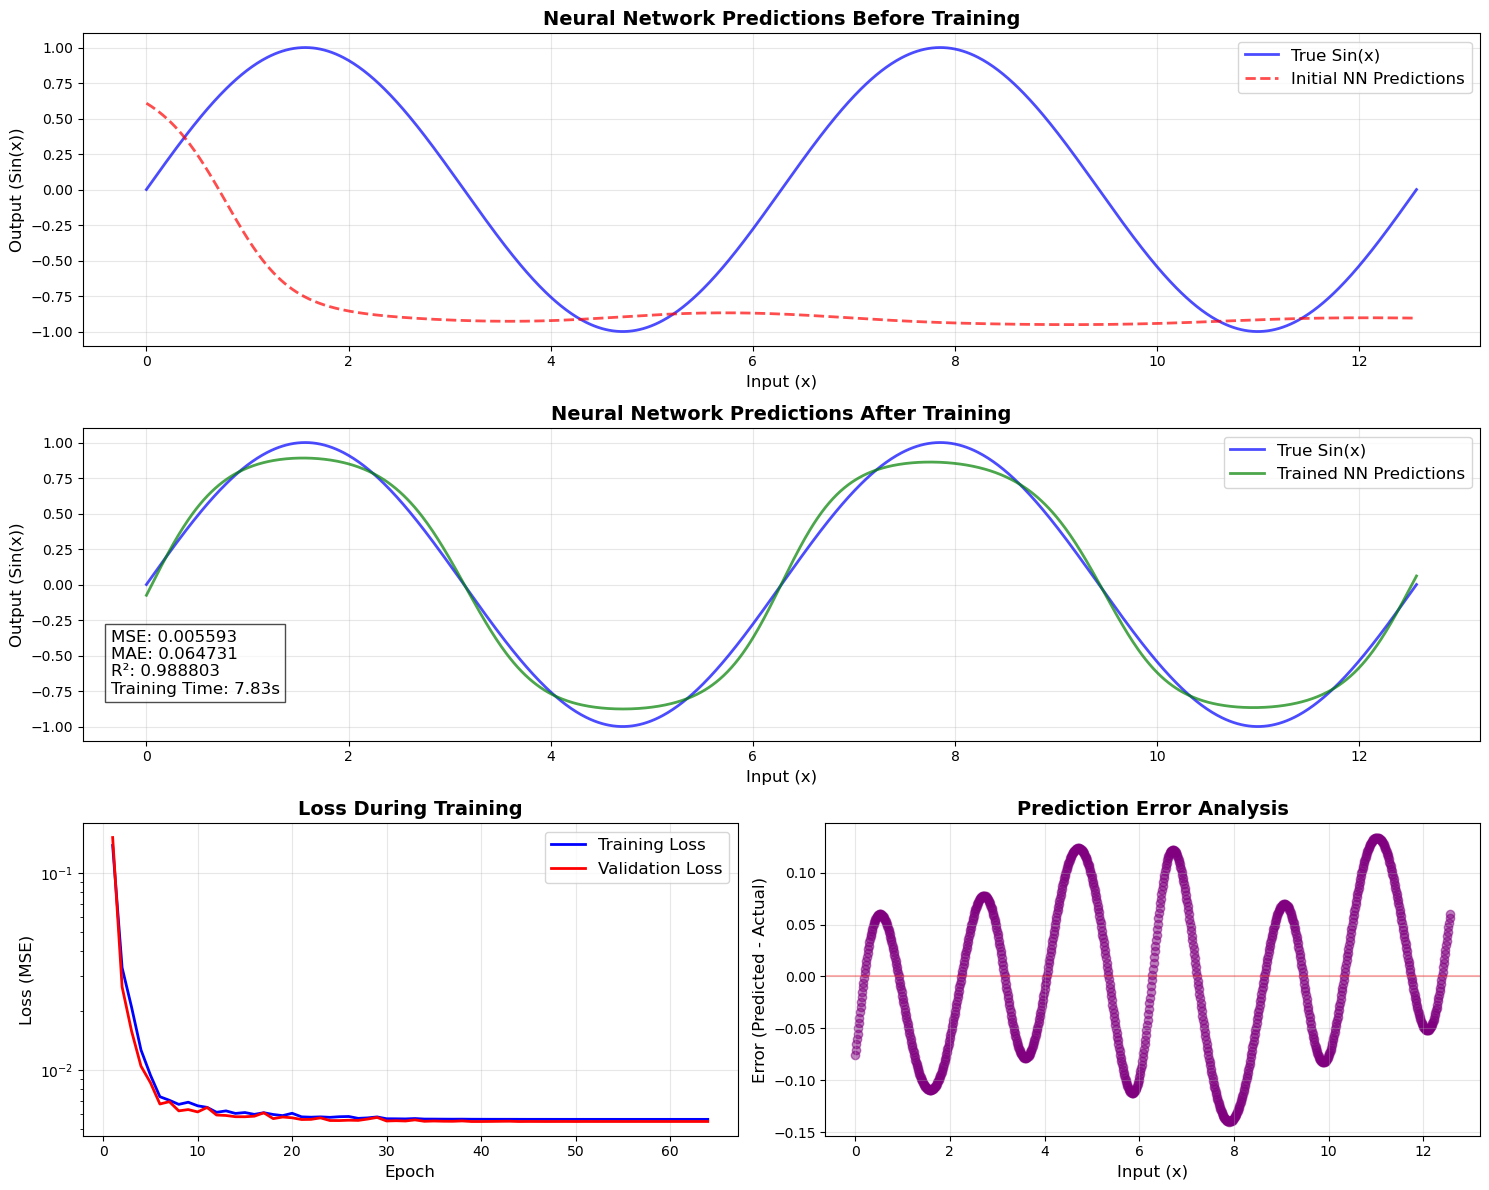

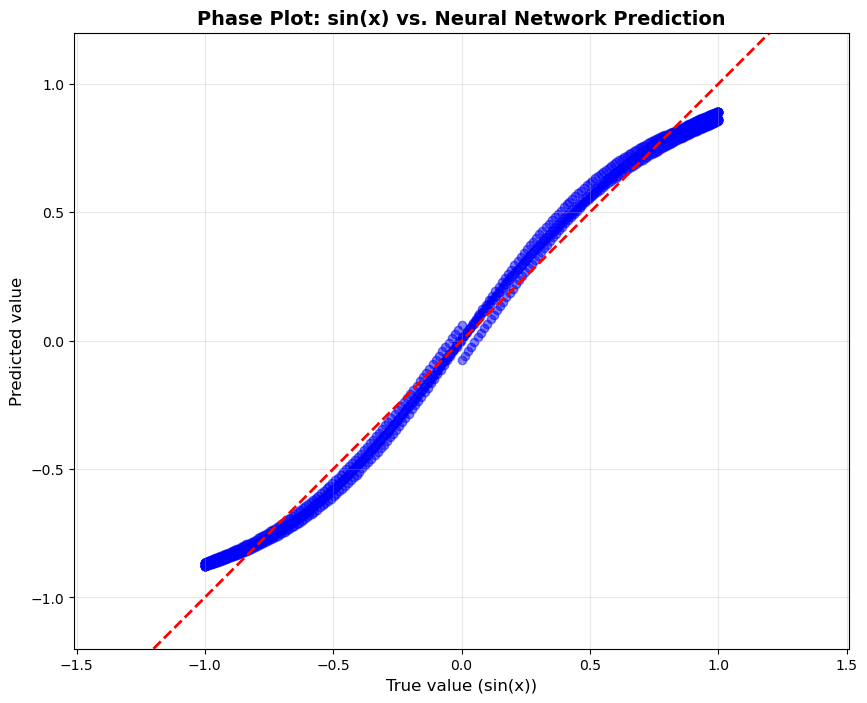

In [175]:
# Suppress tqdm warning
warnings.filterwarnings("ignore", category=UserWarning)

# Generate data with more range for better testing
x = np.linspace(0, 4 * np.pi, 1000)  # Expanded range to test generalization
y = np.sin(x)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Prepare data in the format needed by the neural network
training_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1)) 
    for i, j in zip(x_train, y_train)
]
validation_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1)) 
    for i, j in zip(x_val, y_val)
]

# Feature engineering: Add sin and cos of the input as features
# This helps the network learn periodic functions much faster
training_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y) 
    for x, y in training_data
]
validation_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y) 
    for x, y in validation_data
]

# Optimized network architecture for sine wave approximation
# with momentum
nn = NeuralNetwork(
    layer_sizes=[3, 32, 16, 1],  # Smaller network with engineered features
    activations=['tanh', 'tanh', 'tanh'],  # Tanh is ideal for sine waves
    dropout_rates=[0.0, 0.0, 0]  # No dropout needed with proper features
)

# Minimal L2 regularization
nn.lambd = 0.0

# Compute initial predictions for visualization
nn.toggle_training(False)
initial_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    initial_predictions.append(nn.feedforward(enhanced_input)[0][0])
initial_predictions = np.array(initial_predictions)

# Create figure with better layout
plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2)

# Plot 1: Initial predictions
ax1 = plt.subplot(gs[0, :])
ax1.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax1.plot(x, initial_predictions, 'r--', label="Initial NN Predictions", linewidth=2, alpha=0.7)
ax1.set_title("Neural Network Predictions Before Training", fontsize=14, fontweight='bold')
ax1.set_xlabel("Input (x)", fontsize=12)
ax1.set_ylabel("Output (Sin(x))", fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Train the network with optimized hyperparameters
print("Training neural network...")
start_time = time.time()

history = nn.train(
    training_data=training_data_enhanced,
    epochs=200,  # Fewer epochs needed with better features
    mini_batch_size=32,  # Smaller batches for more frequent updates
    learning_rate=0.01,  # Higher learning rate is fine with proper initialization
    decay=0.005,  # Slower decay
    schedule_type="exp_decay",  # Exponential decay for smoother reduction
    validation_data=validation_data_enhanced,
    early_stopping_patience=20,  # Earlier stopping is fine
    verbose=True
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Get final predictions
nn.toggle_training(False)
trained_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    trained_predictions.append(nn.feedforward(enhanced_input)[0][0])
trained_predictions = np.array(trained_predictions)

# Plot 2: Final predictions
ax2 = plt.subplot(gs[1, :])
ax2.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax2.plot(x, trained_predictions, 'g-', label="Trained NN Predictions", linewidth=2, alpha=0.7)
ax2.set_title("Neural Network Predictions After Training", fontsize=14, fontweight='bold')
ax2.set_xlabel("Input (x)", fontsize=12)
ax2.set_ylabel("Output (Sin(x))", fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# Compute error metrics
mse = np.mean((trained_predictions - y) ** 2)
mae = np.mean(np.abs(trained_predictions - y))
r2 = 1 - np.sum((y - trained_predictions) ** 2) / np.sum((y - np.mean(y)) ** 2)

# Add error metrics as text
metrics_text = f"MSE: {mse:.6f}\nMAE: {mae:.6f}\nR²: {r2:.6f}\nTraining Time: {training_time:.2f}s"
ax2.text(0.02, 0.15, metrics_text, transform=ax2.transAxes, 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Plot 3: Training and validation loss
ax3 = plt.subplot(gs[2, 0])
epochs = range(1, len(history['loss']) + 1)
ax3.plot(epochs, history['loss'], 'b-', label='Training Loss', linewidth=2)
ax3.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax3.set_title("Loss During Training", fontsize=14, fontweight='bold')
ax3.set_xlabel("Epoch", fontsize=12)
ax3.set_ylabel("Loss (MSE)", fontsize=12)
ax3.set_yscale('log')  # Log scale for better visualization
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)

# Plot 4: Error analysis
ax4 = plt.subplot(gs[2, 1])
error = trained_predictions - y
ax4.scatter(x, error, color='purple', alpha=0.5)
ax4.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax4.set_title("Prediction Error Analysis", fontsize=14, fontweight='bold')
ax4.set_xlabel("Input (x)", fontsize=12)
ax4.set_ylabel("Error (Predicted - Actual)", fontsize=12)
ax4.grid(True, alpha=0.3)

# Improve layout
plt.tight_layout()
plt.savefig('neural_network_sin_approximation.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional visualization: Phase plot to verify the learned function behaves correctly
plt.figure(figsize=(10, 8))
plt.title("Phase Plot: sin(x) vs. Neural Network Prediction", fontsize=14, fontweight='bold')
plt.scatter(y, trained_predictions, alpha=0.5, color='blue')
plt.plot([-1.2, 1.2], [-1.2, 1.2], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel("True value (sin(x))", fontsize=12)
plt.ylabel("Predicted value", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.savefig('phase_plot.png', dpi=300, bbox_inches='tight')
plt.show()

Training neural network...
tqdm not installed. Install with 'pip install tqdm' for progress bars.
Epoch 1/200, Loss: 0.354362, Val Loss: 0.374709, LR: 0.010000
Epoch 11/200, Loss: 0.020498, Val Loss: 0.020415, LR: 0.007596
Epoch 21/200, Loss: 0.012127, Val Loss: 0.011840, LR: 0.003499
Epoch 31/200, Loss: 0.010900, Val Loss: 0.010622, LR: 0.000978
Epoch 41/200, Loss: 0.010680, Val Loss: 0.010401, LR: 0.000166
Epoch 51/200, Loss: 0.010650, Val Loss: 0.010371, LR: 0.000017
Epoch 61/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000001
Epoch 71/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Epoch 81/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Epoch 91/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Epoch 101/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Epoch 111/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Epoch 121/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Epoch 131/200, Loss: 0.010647, Val Loss: 0.010368, LR: 0.000000
Early stopping at

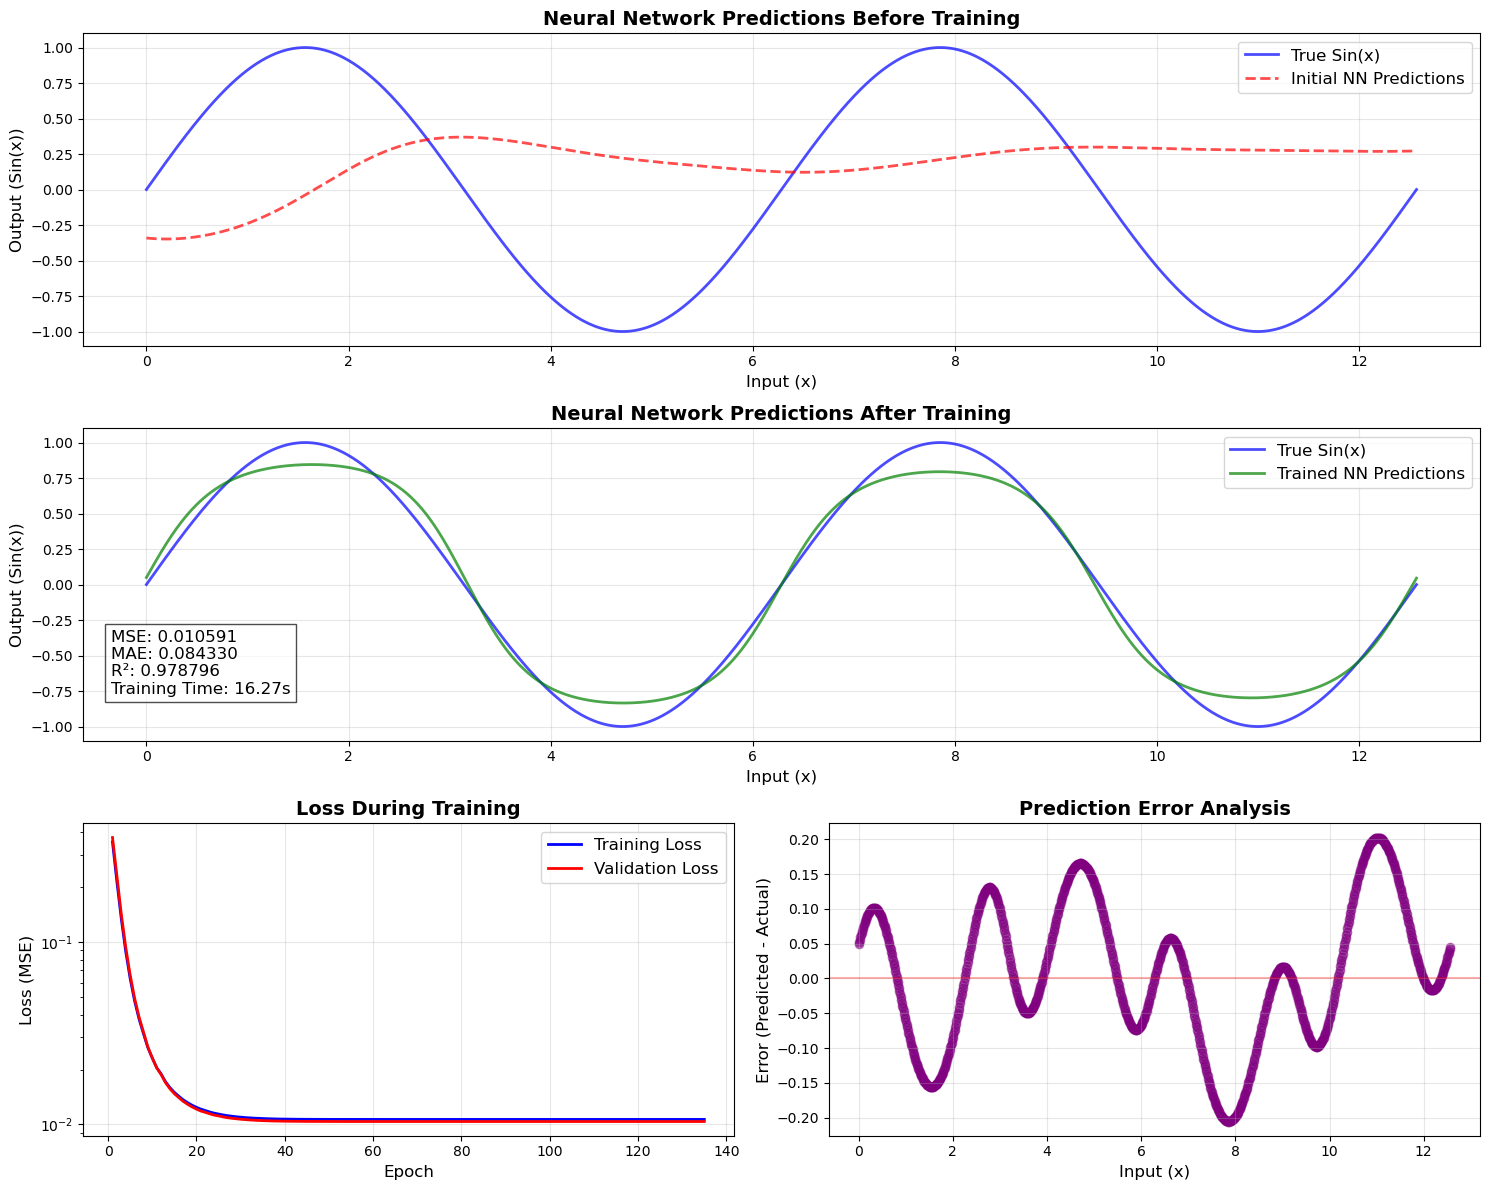

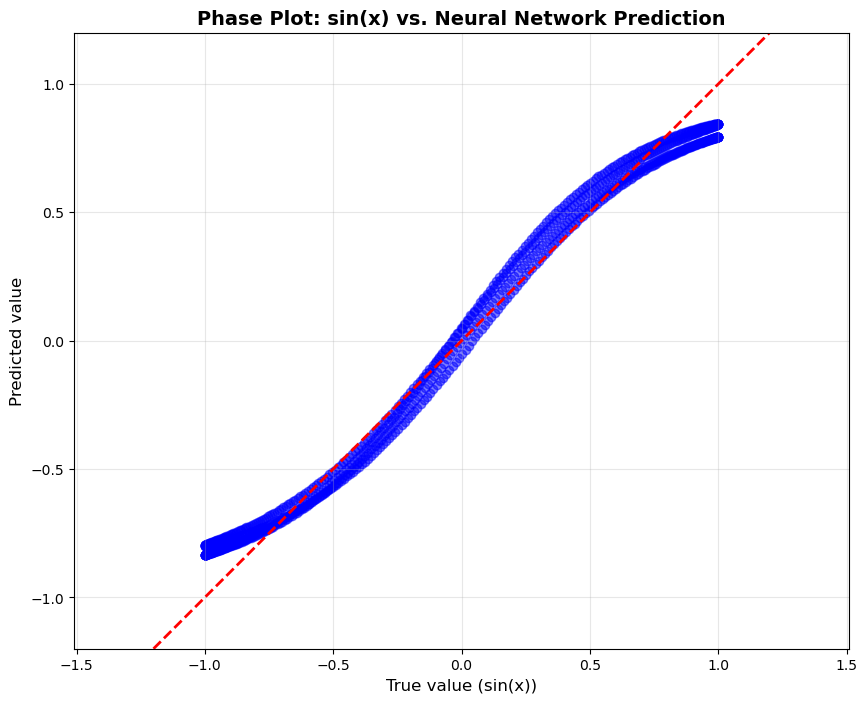

In [176]:
# Suppress tqdm warning
warnings.filterwarnings("ignore", category=UserWarning)

# Generate data with more range for better testing
x = np.linspace(0, 4 * np.pi, 1000)  # Expanded range to test generalization
y = np.sin(x)

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Prepare data in the format needed by the neural network
training_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1)) 
    for i, j in zip(x_train, y_train)
]
validation_data = [
    (np.array([i]).reshape(1, 1), np.array([j]).reshape(1, 1)) 
    for i, j in zip(x_val, y_val)
]

# Feature engineering: Add sin and cos of the input as features
# This helps the network learn periodic functions much faster
training_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y) 
    for x, y in training_data
]
validation_data_enhanced = [
    (np.array([[x[0][0], np.sin(x[0][0]), np.cos(x[0][0])]]).T, y) 
    for x, y in validation_data
]

# Optimized network architecture for sine wave approximation
# standard gradient descent
nn = NeuralNetwork(
    layer_sizes=[3, 32, 16, 1],  # Smaller network with engineered features
    activations=['tanh', 'tanh', 'tanh'],  # Tanh is ideal for sine waves
    dropout_rates=[0.0, 0.0, 0],  # No dropout needed with proper features
    momentum=False
)

# Minimal L2 regularization
nn.lambd = 0.0

# Compute initial predictions for visualization
nn.toggle_training(False)
initial_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    initial_predictions.append(nn.feedforward(enhanced_input)[0][0])
initial_predictions = np.array(initial_predictions)

# Create figure with better layout
plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2)

# Plot 1: Initial predictions
ax1 = plt.subplot(gs[0, :])
ax1.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax1.plot(x, initial_predictions, 'r--', label="Initial NN Predictions", linewidth=2, alpha=0.7)
ax1.set_title("Neural Network Predictions Before Training", fontsize=14, fontweight='bold')
ax1.set_xlabel("Input (x)", fontsize=12)
ax1.set_ylabel("Output (Sin(x))", fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Train the network with optimized hyperparameters
print("Training neural network...")
start_time = time.time()

history = nn.train(
    training_data=training_data_enhanced,
    epochs=200,  # Fewer epochs needed with better features
    mini_batch_size=32,  # Smaller batches for more frequent updates
    learning_rate=0.01,  # Higher learning rate is fine with proper initialization
    decay=0.005,  # Slower decay
    schedule_type="exp_decay",  # Exponential decay for smoother reduction
    validation_data=validation_data_enhanced,
    early_stopping_patience=20,  # Earlier stopping is fine
    verbose=True
)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Get final predictions
nn.toggle_training(False)
trained_predictions = []
for i in x:
    # Create the feature-engineered input
    enhanced_input = np.array([[i, np.sin(i), np.cos(i)]]).T
    trained_predictions.append(nn.feedforward(enhanced_input)[0][0])
trained_predictions = np.array(trained_predictions)

# Plot 2: Final predictions
ax2 = plt.subplot(gs[1, :])
ax2.plot(x, y, 'b-', label="True Sin(x)", linewidth=2, alpha=0.7)
ax2.plot(x, trained_predictions, 'g-', label="Trained NN Predictions", linewidth=2, alpha=0.7)
ax2.set_title("Neural Network Predictions After Training", fontsize=14, fontweight='bold')
ax2.set_xlabel("Input (x)", fontsize=12)
ax2.set_ylabel("Output (Sin(x))", fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# Compute error metrics
mse = np.mean((trained_predictions - y) ** 2)
mae = np.mean(np.abs(trained_predictions - y))
r2 = 1 - np.sum((y - trained_predictions) ** 2) / np.sum((y - np.mean(y)) ** 2)

# Add error metrics as text
metrics_text = f"MSE: {mse:.6f}\nMAE: {mae:.6f}\nR²: {r2:.6f}\nTraining Time: {training_time:.2f}s"
ax2.text(0.02, 0.15, metrics_text, transform=ax2.transAxes, 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Plot 3: Training and validation loss
ax3 = plt.subplot(gs[2, 0])
epochs = range(1, len(history['loss']) + 1)
ax3.plot(epochs, history['loss'], 'b-', label='Training Loss', linewidth=2)
ax3.plot(epochs, history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax3.set_title("Loss During Training", fontsize=14, fontweight='bold')
ax3.set_xlabel("Epoch", fontsize=12)
ax3.set_ylabel("Loss (MSE)", fontsize=12)
ax3.set_yscale('log')  # Log scale for better visualization
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)

# Plot 4: Error analysis
ax4 = plt.subplot(gs[2, 1])
error = trained_predictions - y
ax4.scatter(x, error, color='purple', alpha=0.5)
ax4.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax4.set_title("Prediction Error Analysis", fontsize=14, fontweight='bold')
ax4.set_xlabel("Input (x)", fontsize=12)
ax4.set_ylabel("Error (Predicted - Actual)", fontsize=12)
ax4.grid(True, alpha=0.3)

# Improve layout
plt.tight_layout()
plt.savefig('neural_network_sin_approximation.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional visualization: Phase plot to verify the learned function behaves correctly
plt.figure(figsize=(10, 8))
plt.title("Phase Plot: sin(x) vs. Neural Network Prediction", fontsize=14, fontweight='bold')
plt.scatter(y, trained_predictions, alpha=0.5, color='blue')
plt.plot([-1.2, 1.2], [-1.2, 1.2], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel("True value (sin(x))", fontsize=12)
plt.ylabel("Predicted value", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.savefig('phase_plot.png', dpi=300, bbox_inches='tight')
plt.show()